In [1]:
import os

import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neural_network._multilayer_perceptron import MLPClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from tqdm.auto import tqdm

from sentence_topology.classification.analysis import analyze_classifier
from sentence_topology.classification.grid_search import (
    DEFAULT_GRID_SEARCHED_CLASSIFIERS,
    grid_search_classifiers_params_for_all_embeddings)
from sentence_topology.utils.io import load_embedding

# Classifying embeddings

In [ ]:
evaluated = grid_search_classifiers_params_for_all_embeddings("../embeddings")

In [ ]:
all_cls_names = [
    cls.classifier_type.__name__ for cls in DEFAULT_GRID_SEARCHED_CLASSIFIERS
]
scores = pd.DataFrame(columns=all_cls_names)
params = pd.DataFrame(columns=all_cls_names)

for embed_name, evals in evaluated.items():
    scores.loc[embed_name] = [eval.best_score_ for eval in evals]
    params.loc[embed_name] = [eval.best_params_ for eval in evals]

In [17]:
scores

DecisionTreeClassifier  \
mixup_all_doc2vec_vsize_2.tsv                                          0.151421   
mixup_all_doc2vec_vsize_3.tsv                                          0.149133   
paraphrase-multilingual-MiniLM-L12-v2.tsv                              0.193462   
mixup_all_doc2vec_vsize_256.tsv                                        0.150112   
doc2vec_vsize_3.tsv                                                    0.147964   
doc2vec_vsize_256.tsv                                                  0.180971   
mixup_by_seed_doc2vec_vsize_2.tsv                                      0.152428   
mixup_all_paraphrase-multilingual-MiniLM-L12-v2.tsv                    0.149837   
paraphrase-multilingual-MiniLM-L12-v2_supervised_4.tsv                 0.288932   
doc2vec_vsize_100.tsv                                                  0.172071   
mixup_all_doc2vec-cs-vecsize-512-train-1M-sents.tsv                    0.151962   
mixup_all_doc2vec_vsize_100.tsv                                        0.144837   
paraphrase-multilingual-MiniLM-L12-v2_supervised_1.tsv                 0.367892   
paraphrase-multilingual-MiniLM-L12-v2_supervised_3.tsv                 0.311540   
doc2vec-cs-vecsize-512-train-1M-sents.tsv                              0.175507   
paraphrase-multilingual-MiniLM-L12-v2_supervised_2.tsv                 0.339332   
doc2vec_vsize_10.tsv                                                   0.170211   
mixup_by_seed_doc2vec_vsize_256.tsv                                    0.149985   
mixup_all_doc2vec_vsize_10.tsv                                         0.149020   
mixup_by_seed_doc2vec_vsize_3.tsv                                      0.147114   
paraphrase-multilingual-MiniLM-L12-v2_supervised_0.tsv                 0.322761   
mixup_by_seed_doc2vec_vsize_100.tsv                                    0.150265   
mixup_by_seed_doc2vec_vsize_10.tsv                                     0.144495   
mixup_by_seed_doc2vec-cs-vecsize-512-train-1M-sents.tsv                0.153720   
mixup_by_seed_paraphrase-multilingual-MiniLM-L12-v2.tsv                0.152002   
doc2vec_vsize_2.tsv                                                    0.149845   

                                                         MLPClassifier  \
mixup_all_doc2vec_vsize_2.tsv                                 0.155139   
mixup_all_doc2vec_vsize_3.tsv                                 0.155124   
paraphrase-multilingual-MiniLM-L12-v2.tsv                     0.279104   
mixup_all_doc2vec_vsize_256.tsv                               0.110499   
doc2vec_vsize_3.tsv                                           0.157258   
doc2vec_vsize_256.tsv                                         0.230574   
mixup_by_seed_doc2vec_vsize_2.tsv                             0.155293   
mixup_all_paraphrase-multilingual-MiniLM-L12-v2.tsv           0.104216   
paraphrase-multilingual-MiniLM-L12-v2_supervised_4.tsv        0.353650   
doc2vec_vsize_100.tsv                                         0.233821   
mixup_all_doc2vec-cs-vecsize-512-train-1M-sents.tsv           0.098720   
mixup_all_doc2vec_vsize_100.tsv                               0.136546   
paraphrase-multilingual-MiniLM-L12-v2_supervised_1.tsv        0.378635   
paraphrase-multilingual-MiniLM-L12-v2_supervised_3.tsv        0.335848   
doc2vec-cs-vecsize-512-train-1M-sents.tsv                     0.221456   
paraphrase-multilingual-MiniLM-L12-v2_supervised_2.tsv        0.376379   
doc2vec_vsize_10.tsv                                          0.185453   
mixup_by_seed_doc2vec_vsize_256.tsv                           0.106947   
mixup_all_doc2vec_vsize_10.tsv                                0.155182   
mixup_by_seed_doc2vec_vsize_3.tsv                             0.155149   
paraphrase-multilingual-MiniLM-L12-v2_supervised_0.tsv        0.383842   
mixup_by_seed_doc2vec_vsize_100.tsv                           0.144353   
mixup_by_seed_doc2vec_vsize_10.tsv                            0.155430   
mixup_by_seed_doc2vec-cs-vecsize-512-tr

In [18]:
pd.set_option("display.max_colwidth", None)
params

DecisionTreeClassifier  \
mixup_all_doc2vec_vsize_2.tsv                             {'max_depth': 6, 'max_leaf_nodes': 20, 'min_samples_split': 2}   
mixup_all_doc2vec_vsize_3.tsv                            {'max_depth': 18, 'max_leaf_nodes': 20, 'min_samples_split': 2}   
paraphrase-multilingual-MiniLM-L12-v2.tsv                {'max_depth': 18, 'max_leaf_nodes': 50, 'min_samples_split': 2}   
mixup_all_doc2vec_vsize_256.tsv                           {'max_depth': 6, 'max_leaf_nodes': 20, 'min_samples_split': 2}   
doc2vec_vsize_3.tsv                                       {'max_depth': 6, 'max_leaf_nodes': 20, 'min_samples_split': 2}   
doc2vec_vsize_256.tsv                                    {'max_depth': 18, 'max_leaf_nodes': 20, 'min_samples_split': 2}   
mixup_by_seed_doc2vec_vsize_2.tsv                        {'max_depth': 18, 'max_leaf_nodes': 20, 'min_samples_split': 5}   
mixup_all_paraphrase-multilingual-MiniLM-L12-v2.tsv       {'max_depth': 6, 'max_leaf_nodes': 20, 'min_samples_split': 5}   
paraphrase-multilingual-MiniLM-L12-v2_supervised_4.tsv   {'max_depth': 18, 'max_leaf_nodes': 20, 'min_samples_split': 2}   
doc2vec_vsize_100.tsv                                    {'max_depth': 18, 'max_leaf_nodes': 20, 'min_samples_split': 2}   
mixup_all_doc2vec-cs-vecsize-512-train-1M-sents.tsv      {'max_depth': 18, 'max_leaf_nodes': 20, 'min_samples_split': 2}   
mixup_all_doc2vec_vsize_100.tsv                          {'max_depth': 18, 'max_leaf_nodes': 20, 'min_samples_split': 2}   
paraphrase-multilingual-MiniLM-L12-v2_supervised_1.tsv   {'max_depth': 32, 'max_leaf_nodes': 20, 'min_samples_split': 5}   
paraphrase-multilingual-MiniLM-L12-v2_supervised_3.tsv   {'max_depth': 32, 'max_leaf_nodes': 20, 'min_samples_split': 2}   
doc2vec-cs-vecsize-512-train-1M-sents.tsv                 {'max_depth': 6, 'max_leaf_nodes': 50, 'min_samples_split': 2}   
paraphrase-multilingual-MiniLM-L12-v2_supervised_2.tsv   {'max_depth': 32, 'max_leaf_nodes': 20, 'min_samples_split': 2}   
doc2vec_vsize_10.tsv                                     {'max_depth': 18, 'max_leaf_nodes': 20, 'min_samples_split': 2}   
mixup_by_seed_doc2vec_vsize_256.tsv                       {'max_depth': 6, 'max_leaf_nodes': 70, 'min_samples_split': 2}   
mixup_all_doc2vec_vsize_10.tsv                           {'max_depth': 18, 'max_leaf_nodes': 20, 'min_samples_split': 2}   
mixup_by_seed_doc2vec_vsize_3.tsv                         {'max_depth': 6, 'max_leaf_nodes': 70, 'min_samples_split': 2}   
paraphrase-multilingual-MiniLM-L12-v2_supervised_0.tsv   {'max_depth': 32, 'max_leaf_nodes': 20, 'min_samples_split': 2}   
mixup_by_seed_doc2vec_vsize_100.tsv                      {'max_depth': 18, 'max_leaf_nodes': 20, 'min_samples_split': 2}   
mixup_by_seed_doc2vec_vsize_10.tsv                       {'max_depth': 18, 'max_leaf_nodes': 20, 'min_samples_split': 2}   
mixup_by_seed_doc2vec-cs-vecsize-512-train-1M-sents.tsv  {'max_depth': 32, 'max_leaf_nodes': 20, 'min_samples_split': 5}   
mixup_by_seed_paraphrase-multilingual-MiniLM-L12-v2.tsv  {'max_depth': 32, 'max_leaf_nodes': 20, 'min_samples_split': 2}   
doc2vec_vsize_2.tsv                                      {'max_depth': 18, 'max_leaf_nodes': 50, 'min_samples_split': 2}   

                                                                                                                        MLPClassifier  \
mixup_all_doc2vec_vsize_2.tsv                                   {'activation': 'relu', 'hidden_layer_sizes': (25,), 'max_iter': 1000}   
mixup_all_doc2vec_vsize_3.tsv                               {'activation': 'logistic', 'hidden_layer_sizes': (25,), 'max_iter': 1000}   
paraphrase-multilingual-MiniLM-L12-v2.tsv                   {'activation': 'logistic', 'hidden_layer_sizes': (25,), 'max_iter': 1000}   
mixup_all_doc2vec_vsize_256.tsv                           {'activation': 'logistic', 'hidden_layer_sizes': (25, 5), 'max_iter': 1000}   
doc2vec_vsize_3.tsv                                             

In [19]:
scores.to_pickle("../results/classification_gs_accuracies.pkl")
params.to_pickle("../results/classification_gs_params.pkl")

In [2]:
scores = pd.read_pickle("../results/classification_gs_accuracies.pkl")
params = pd.read_pickle("../results/classification_gs_params.pkl")

In [3]:
cls_type_by_name = {}
for type_ in [
    DecisionTreeClassifier,
    MLPClassifier,
    RandomForestClassifier,
    SVC,
    KNeighborsClassifier,
]:
    cls_type_by_name[type_.__name__] = type_

  0%|          | 0/26 [00:00<?, ?it/s]

/home/dburian/.local/share/python-venvs/sentence_topo/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/dburian/.local/share/python-venvs/sentence_topo/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/dburian/.local/share/python-venvs/sentence_topo/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this 

2023-04-14T14:06:31.109129+0200 - Timed out waiting for syncing to complete.


/home/dburian/.local/share/python-venvs/sentence_topo/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/dburian/.local/share/python-venvs/sentence_topo/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/dburian/.local/share/python-venvs/sentence_topo/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this 

2023-04-14T14:06:36.711658+0200 - Timed out waiting for syncing to complete.


/home/dburian/.local/share/python-venvs/sentence_topo/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/dburian/.local/share/python-venvs/sentence_topo/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/dburian/.local/share/python-venvs/sentence_topo/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this 

2023-04-14T14:06:43.089887+0200 - Timed out waiting for syncing to complete.


/home/dburian/.local/share/python-venvs/sentence_topo/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/dburian/.local/share/python-venvs/sentence_topo/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/dburian/.local/share/python-venvs/sentence_topo/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this 

2023-04-14T14:06:48.885141+0200 - Timed out waiting for syncing to complete.
2023-04-14T14:06:48.948098+0200 - An error has been caught in function 'handle_one_request', process 'MainProcess' (414937), thread 'Thread-5 (serve_forever)' (140274628921024):
Traceback (most recent call last):

  File "/usr/lib/python3.10/threading.py", line 973, in _bootstrap
    self._bootstrap_inner()
    │    └ <function Thread._bootstrap_inner at 0x7f9460ff0ca0>
    └ <Thread(Thread-5 (serve_forever), started 140274628921024)>
  File "/usr/lib/python3.10/threading.py", line 1016, in _bootstrap_inner
    self.run()
    │    └ <function Thread.run at 0x7f9460ff09d0>
    └ <Thread(Thread-5 (serve_forever), started 140274628921024)>
  File "/usr/lib/python3.10/threading.py", line 953, in run
    self._target(*self._args, **self._kwargs)
    │    │        │    │        │    └ {}
    │    │        │    │        └ <Thread(Thread-5 (serve_forever), started 140274628921024)>
    │    │        │    └ ()
    │   

/home/dburian/.local/share/python-venvs/sentence_topo/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/dburian/.local/share/python-venvs/sentence_topo/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/dburian/.local/share/python-venvs/sentence_topo/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this 

2023-04-14T14:06:55.273913+0200 - Timed out waiting for syncing to complete.
2023-04-14T14:06:55.312170+0200 - An error has been caught in function 'handle_one_request', process 'MainProcess' (414937), thread 'Thread-5 (serve_forever)' (140274628921024):
Traceback (most recent call last):

  File "/usr/lib/python3.10/threading.py", line 973, in _bootstrap
    self._bootstrap_inner()
    │    └ <function Thread._bootstrap_inner at 0x7f9460ff0ca0>
    └ <Thread(Thread-5 (serve_forever), started 140274628921024)>
  File "/usr/lib/python3.10/threading.py", line 1016, in _bootstrap_inner
    self.run()
    │    └ <function Thread.run at 0x7f9460ff09d0>
    └ <Thread(Thread-5 (serve_forever), started 140274628921024)>
  File "/usr/lib/python3.10/threading.py", line 953, in run
    self._target(*self._args, **self._kwargs)
    │    │        │    │        │    └ {}
    │    │        │    │        └ <Thread(Thread-5 (serve_forever), started 140274628921024)>
    │    │        │    └ ()
    │   

/home/dburian/.local/share/python-venvs/sentence_topo/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/dburian/.local/share/python-venvs/sentence_topo/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/dburian/.local/share/python-venvs/sentence_topo/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this 

2023-04-14T14:07:01.865615+0200 - Timed out waiting for syncing to complete.
2023-04-14T14:07:01.866712+0200 - An error has been caught in function 'handle_one_request', process 'MainProcess' (414937), thread 'Thread-5 (serve_forever)' (140274628921024):
Traceback (most recent call last):

  File "/usr/lib/python3.10/threading.py", line 973, in _bootstrap
    self._bootstrap_inner()
    │    └ <function Thread._bootstrap_inner at 0x7f9460ff0ca0>
    └ <Thread(Thread-5 (serve_forever), started 140274628921024)>
  File "/usr/lib/python3.10/threading.py", line 1016, in _bootstrap_inner
    self.run()
    │    └ <function Thread.run at 0x7f9460ff09d0>
    └ <Thread(Thread-5 (serve_forever), started 140274628921024)>
  File "/usr/lib/python3.10/threading.py", line 953, in run
    self._target(*self._args, **self._kwargs)
    │    │        │    │        │    └ {}
    │    │        │    │        └ <Thread(Thread-5 (serve_forever), started 140274628921024)>
    │    │        │    └ ()
    │   

/home/dburian/.local/share/python-venvs/sentence_topo/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/dburian/.local/share/python-venvs/sentence_topo/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/dburian/.local/share/python-venvs/sentence_topo/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this 

2023-04-14T14:07:12.877154+0200 - Timed out waiting for syncing to complete.
2023-04-14T14:07:12.909398+0200 - An error has been caught in function 'handle_one_request', process 'MainProcess' (414937), thread 'Thread-5 (serve_forever)' (140274628921024):
Traceback (most recent call last):

  File "/usr/lib/python3.10/threading.py", line 973, in _bootstrap
    self._bootstrap_inner()
    │    └ <function Thread._bootstrap_inner at 0x7f9460ff0ca0>
    └ <Thread(Thread-5 (serve_forever), started 140274628921024)>
  File "/usr/lib/python3.10/threading.py", line 1016, in _bootstrap_inner
    self.run()
    │    └ <function Thread.run at 0x7f9460ff09d0>
    └ <Thread(Thread-5 (serve_forever), started 140274628921024)>
  File "/usr/lib/python3.10/threading.py", line 953, in run
    self._target(*self._args, **self._kwargs)
    │    │        │    │        │    └ {}
    │    │        │    │        └ <Thread(Thread-5 (serve_forever), started 140274628921024)>
    │    │        │    └ ()
    │   

/home/dburian/.local/share/python-venvs/sentence_topo/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/dburian/.local/share/python-venvs/sentence_topo/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/dburian/.local/share/python-venvs/sentence_topo/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this 

2023-04-14T14:07:18.894958+0200 - Timed out waiting for syncing to complete.
2023-04-14T14:07:18.915444+0200 - An error has been caught in function 'handle_one_request', process 'MainProcess' (414937), thread 'Thread-5 (serve_forever)' (140274628921024):
Traceback (most recent call last):

  File "/usr/lib/python3.10/threading.py", line 973, in _bootstrap
    self._bootstrap_inner()
    │    └ <function Thread._bootstrap_inner at 0x7f9460ff0ca0>
    └ <Thread(Thread-5 (serve_forever), started 140274628921024)>
  File "/usr/lib/python3.10/threading.py", line 1016, in _bootstrap_inner
    self.run()
    │    └ <function Thread.run at 0x7f9460ff09d0>
    └ <Thread(Thread-5 (serve_forever), started 140274628921024)>
  File "/usr/lib/python3.10/threading.py", line 953, in run
    self._target(*self._args, **self._kwargs)
    │    │        │    │        │    └ {}
    │    │        │    │        └ <Thread(Thread-5 (serve_forever), started 140274628921024)>
    │    │        │    └ ()
    │   

/home/dburian/.local/share/python-venvs/sentence_topo/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/dburian/.local/share/python-venvs/sentence_topo/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/dburian/.local/share/python-venvs/sentence_topo/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this 

2023-04-14T14:07:25.905471+0200 - Timed out waiting for syncing to complete.
2023-04-14T14:07:25.906928+0200 - An error has been caught in function 'handle_one_request', process 'MainProcess' (414937), thread 'Thread-5 (serve_forever)' (140274628921024):
Traceback (most recent call last):

  File "/usr/lib/python3.10/threading.py", line 973, in _bootstrap
    self._bootstrap_inner()
    │    └ <function Thread._bootstrap_inner at 0x7f9460ff0ca0>
    └ <Thread(Thread-5 (serve_forever), started 140274628921024)>
  File "/usr/lib/python3.10/threading.py", line 1016, in _bootstrap_inner
    self.run()
    │    └ <function Thread.run at 0x7f9460ff09d0>
    └ <Thread(Thread-5 (serve_forever), started 140274628921024)>
  File "/usr/lib/python3.10/threading.py", line 953, in run
    self._target(*self._args, **self._kwargs)
    │    │        │    │        │    └ {}
    │    │        │    │        └ <Thread(Thread-5 (serve_forever), started 140274628921024)>
    │    │        │    └ ()
    │   

/home/dburian/.local/share/python-venvs/sentence_topo/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/dburian/.local/share/python-venvs/sentence_topo/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/dburian/.local/share/python-venvs/sentence_topo/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this 

2023-04-14T14:07:31.231608+0200 - Timed out waiting for syncing to complete.
2023-04-14T14:07:31.238742+0200 - An error has been caught in function 'handle_one_request', process 'MainProcess' (414937), thread 'Thread-5 (serve_forever)' (140274628921024):
Traceback (most recent call last):

  File "/usr/lib/python3.10/threading.py", line 973, in _bootstrap
    self._bootstrap_inner()
    │    └ <function Thread._bootstrap_inner at 0x7f9460ff0ca0>
    └ <Thread(Thread-5 (serve_forever), started 140274628921024)>
  File "/usr/lib/python3.10/threading.py", line 1016, in _bootstrap_inner
    self.run()
    │    └ <function Thread.run at 0x7f9460ff09d0>
    └ <Thread(Thread-5 (serve_forever), started 140274628921024)>
  File "/usr/lib/python3.10/threading.py", line 953, in run
    self._target(*self._args, **self._kwargs)
    │    │        │    │        │    └ {}
    │    │        │    │        └ <Thread(Thread-5 (serve_forever), started 140274628921024)>
    │    │        │    └ ()
    │   

/home/dburian/docs/sentence-topology/src/sentence_topology/visualization/predictions.py:46: UserWarning: FixedFormatter should only be used together with FixedLocator
  axes.set_xticklabels(axes.get_xticklabels(), rotation=90)


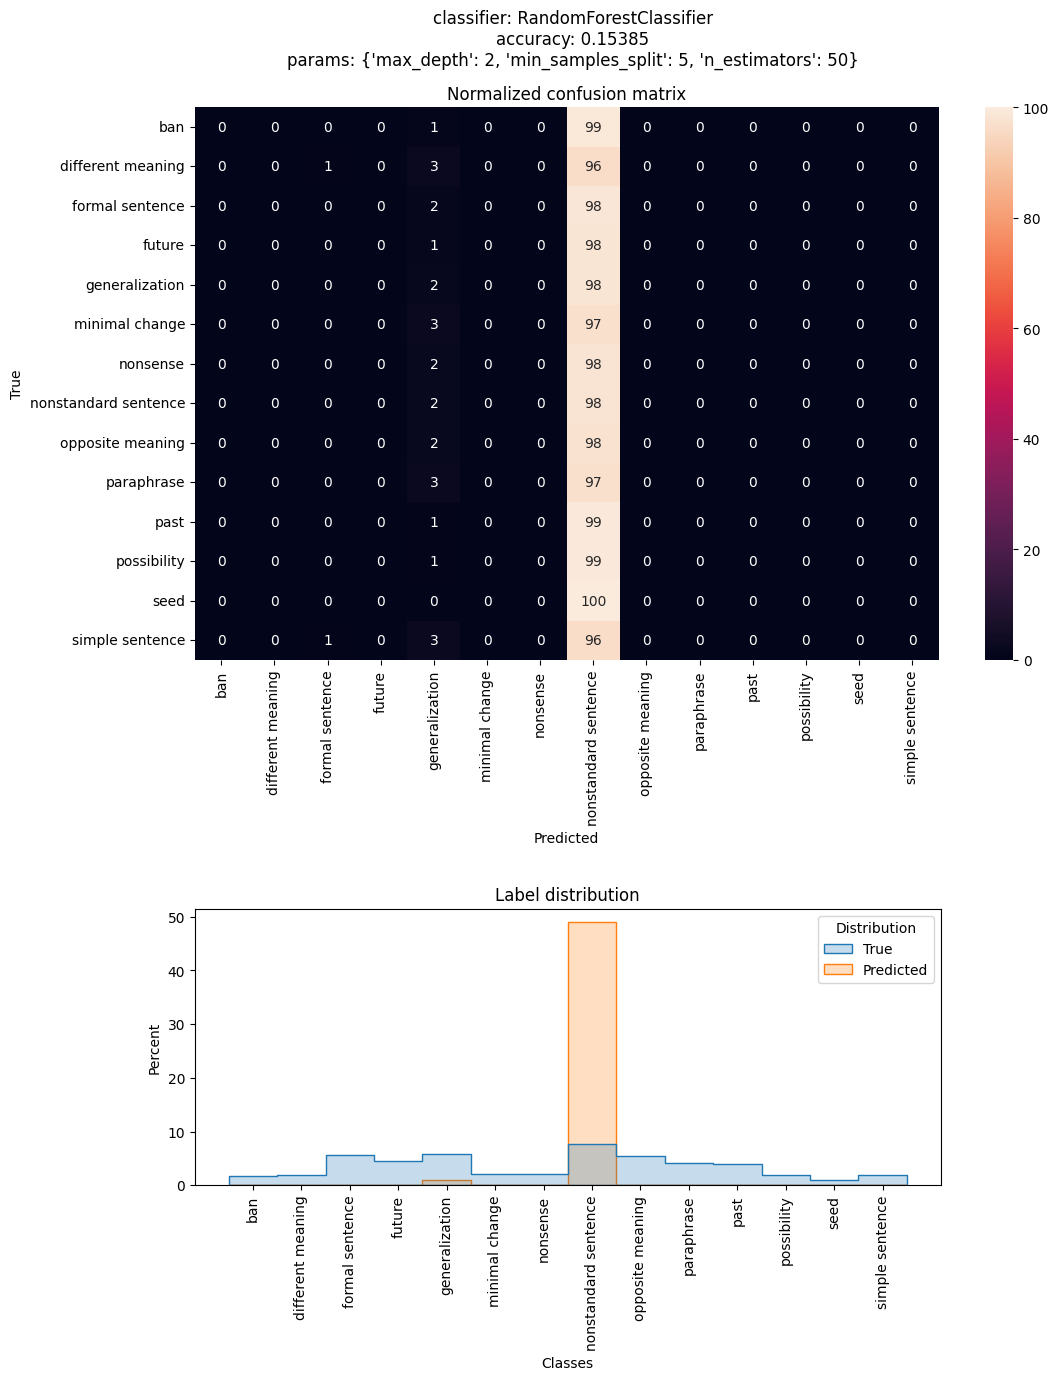

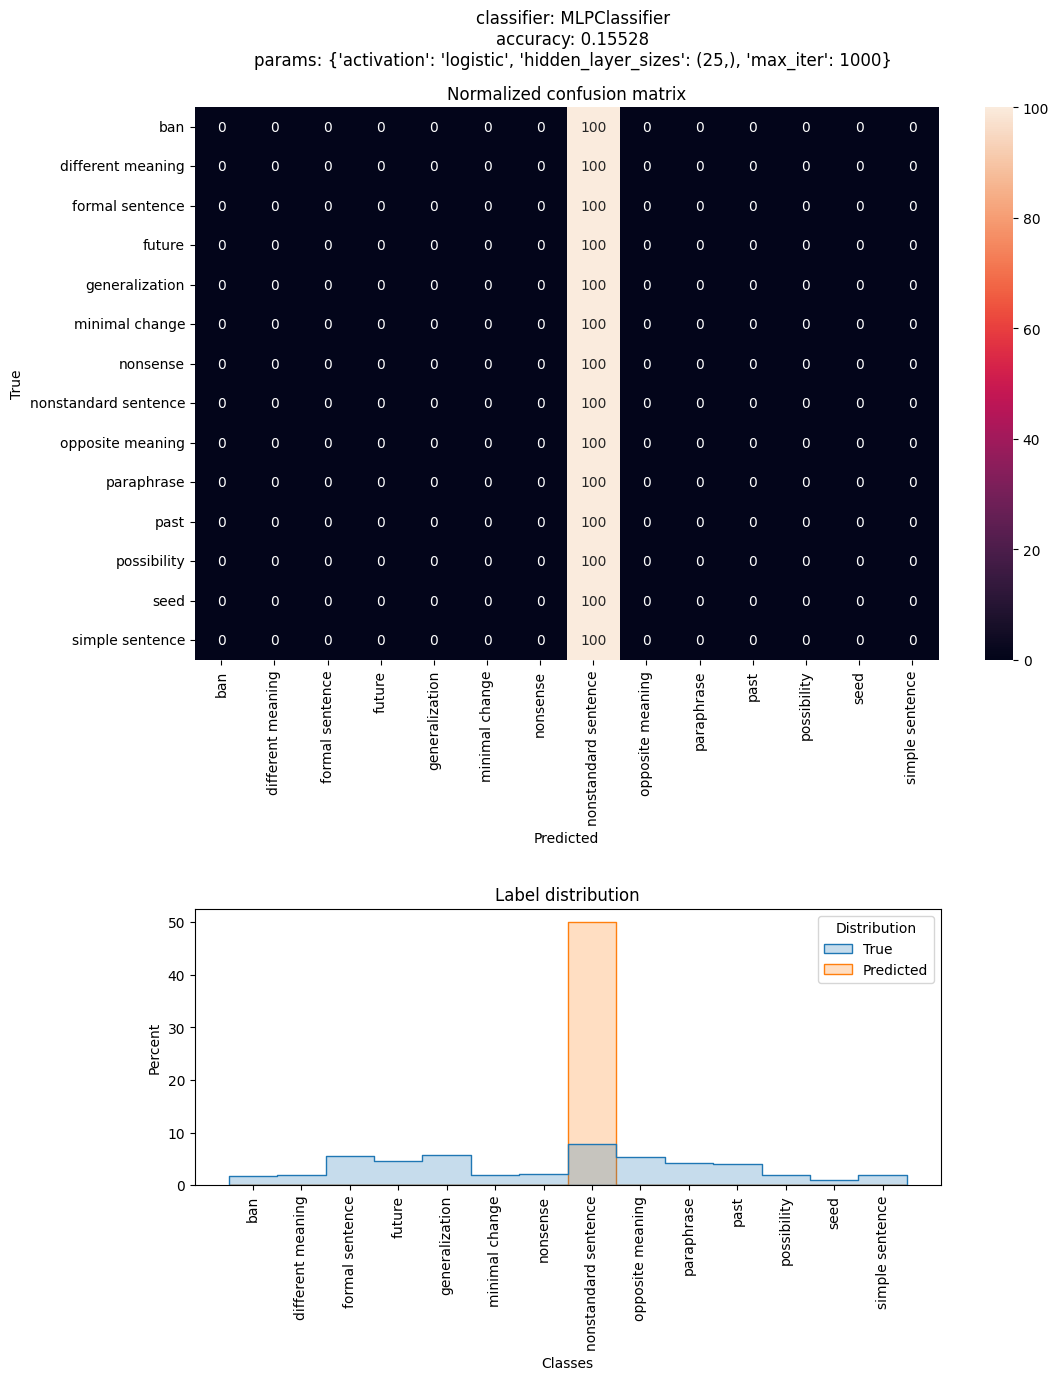

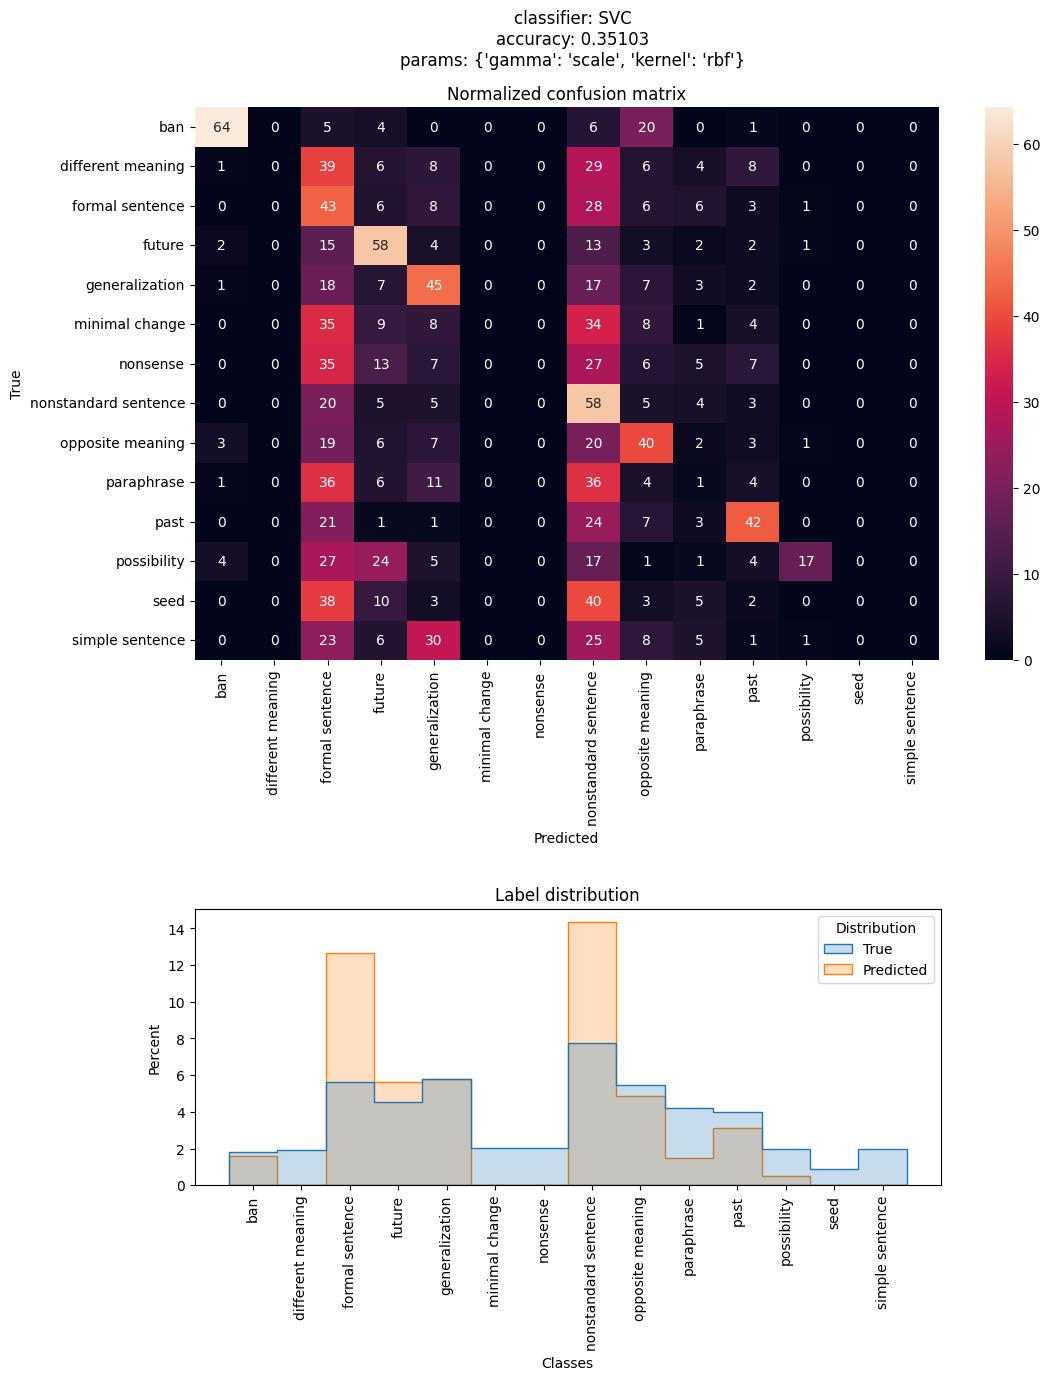

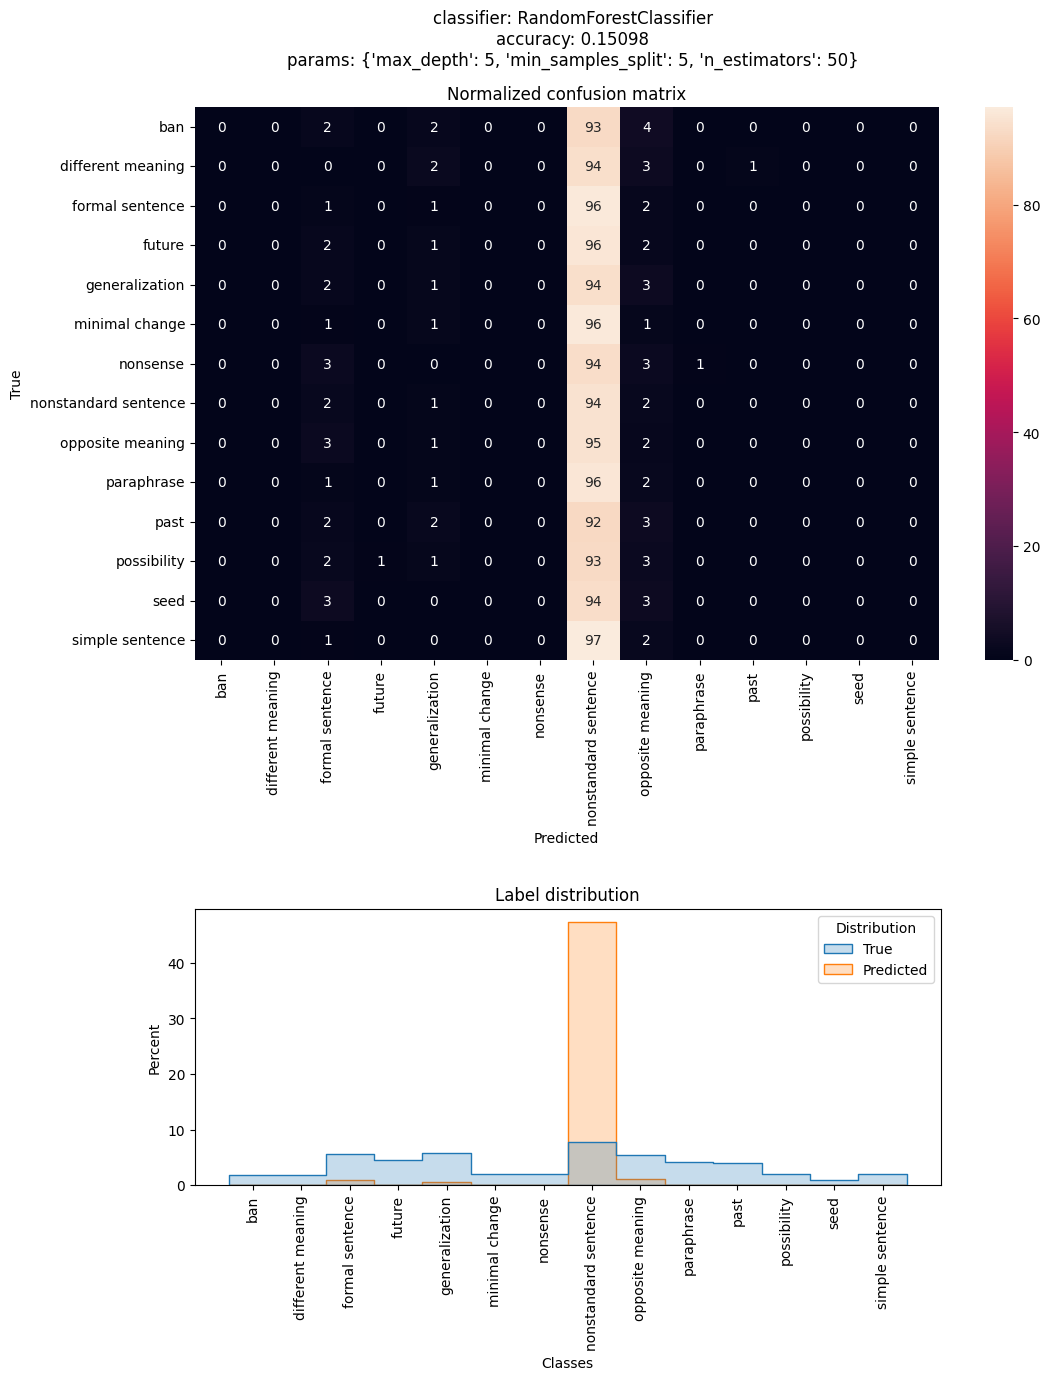

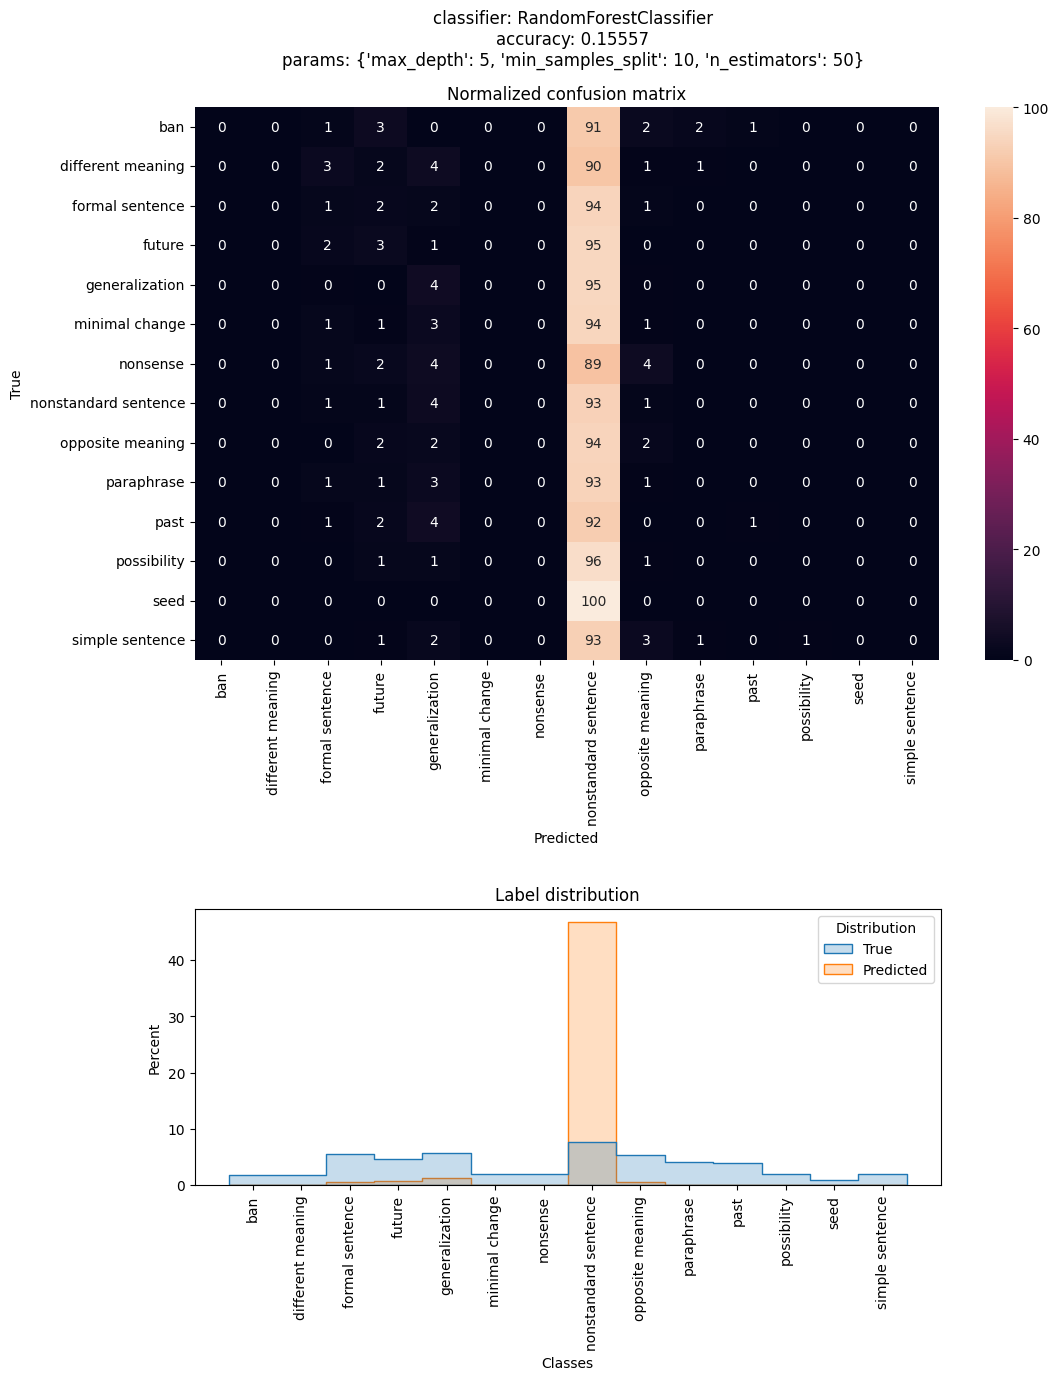

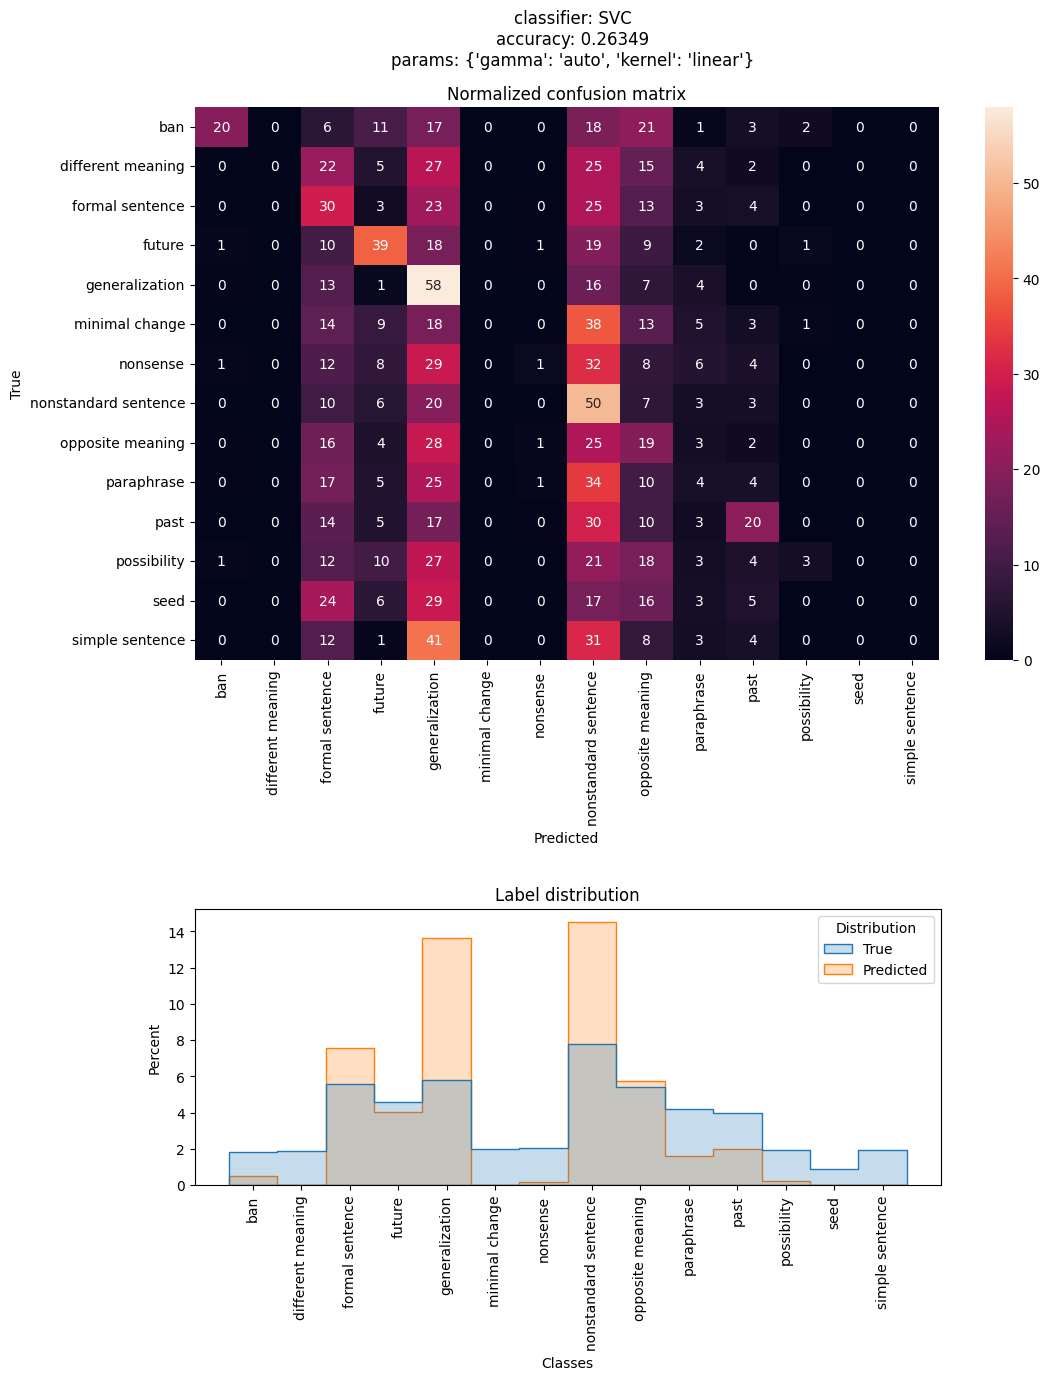

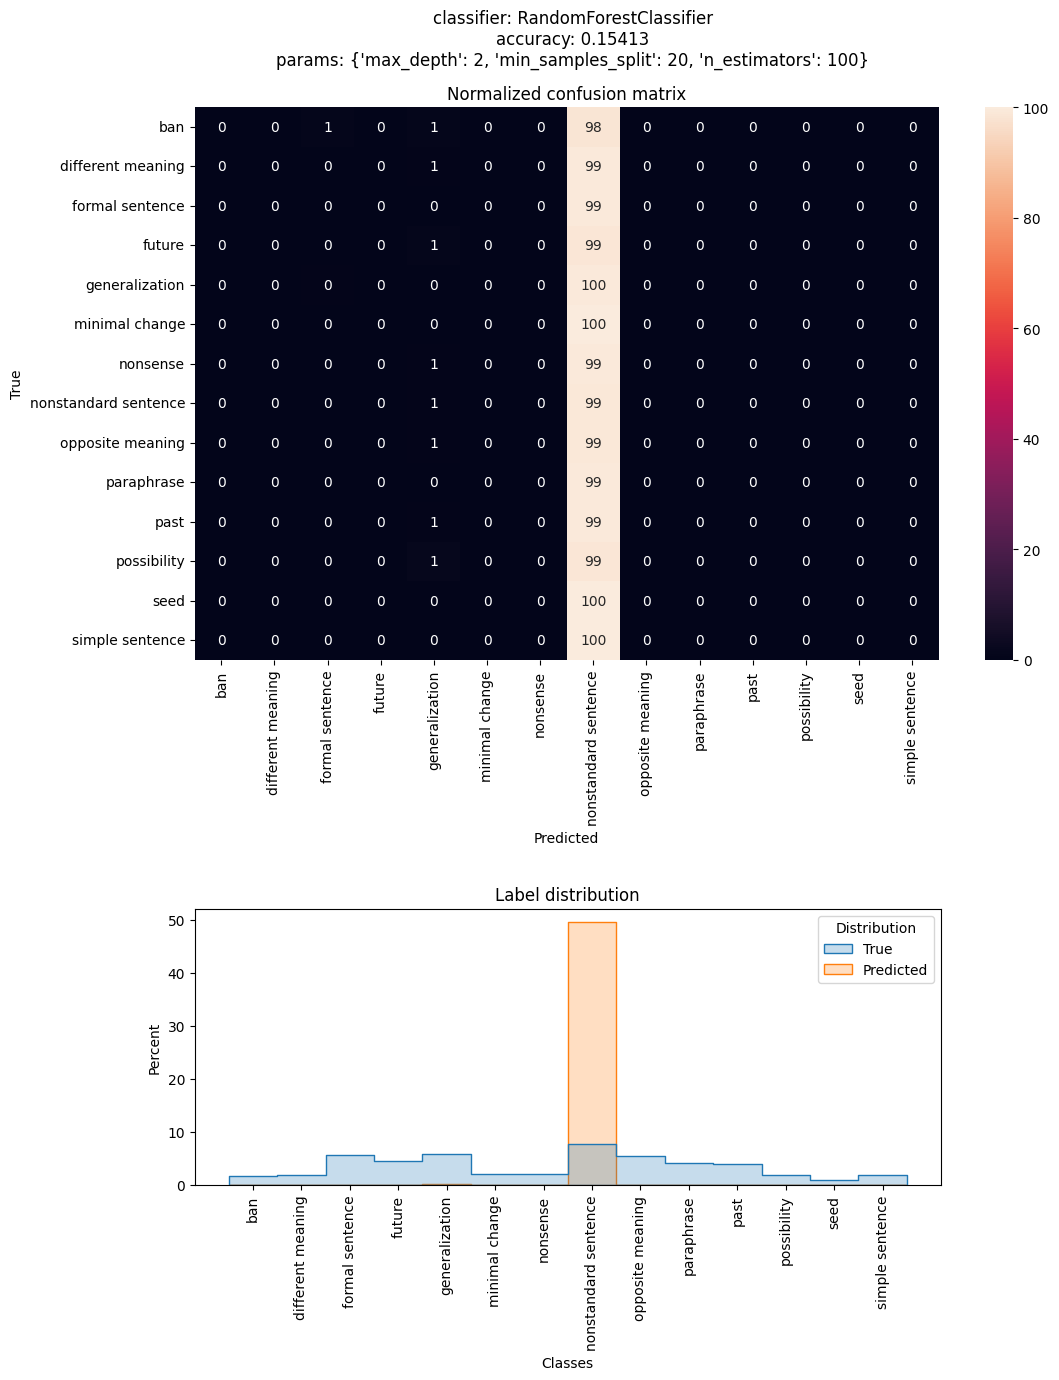

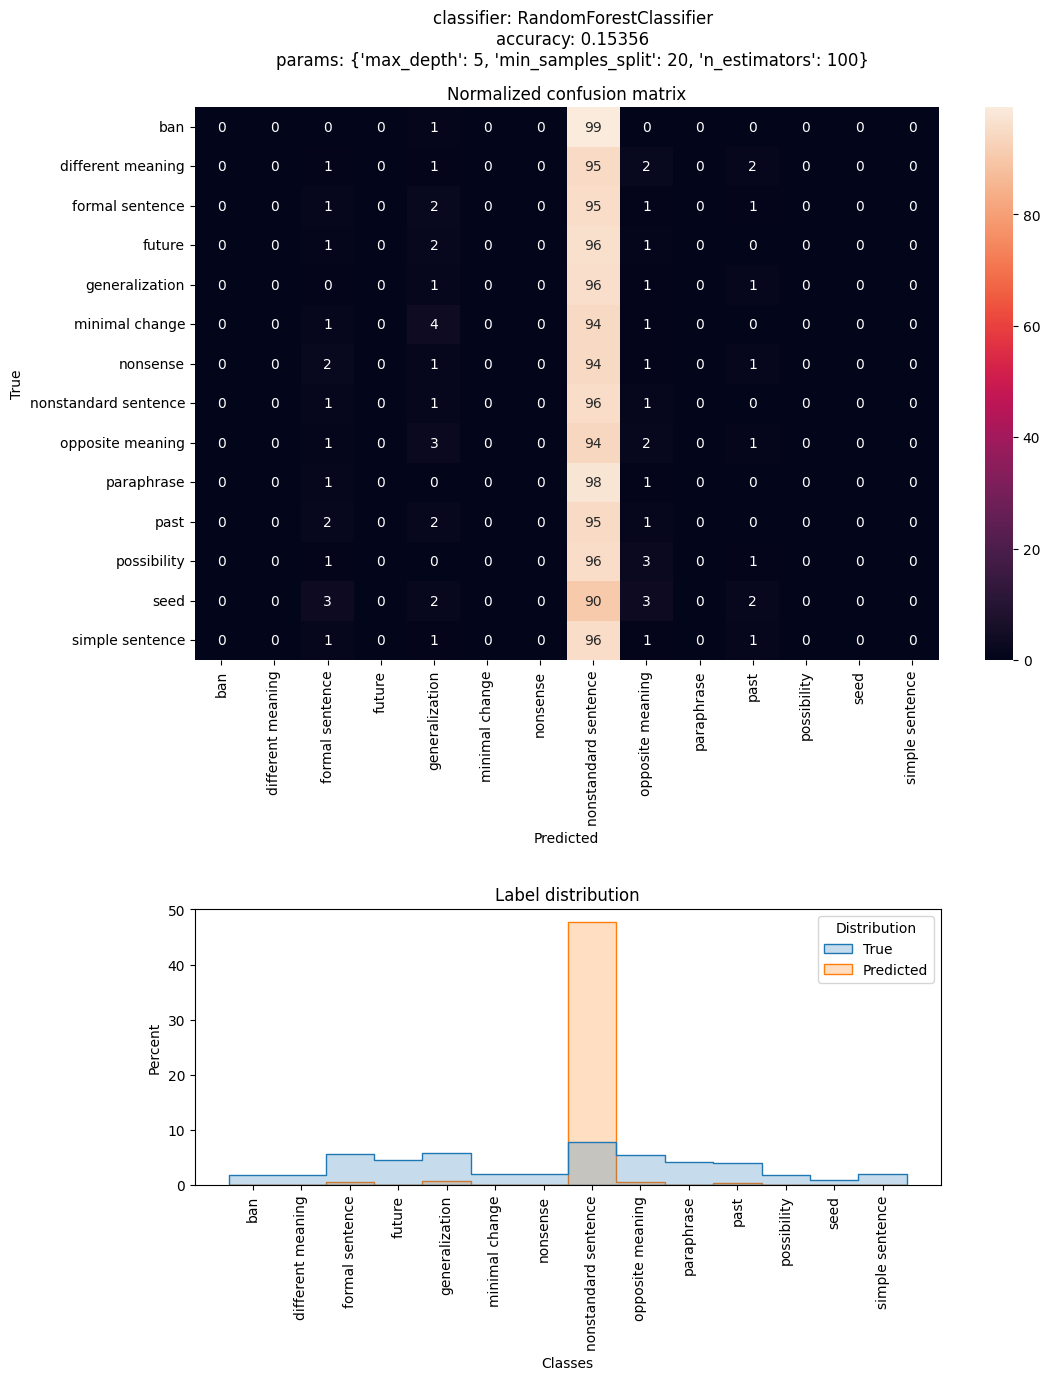

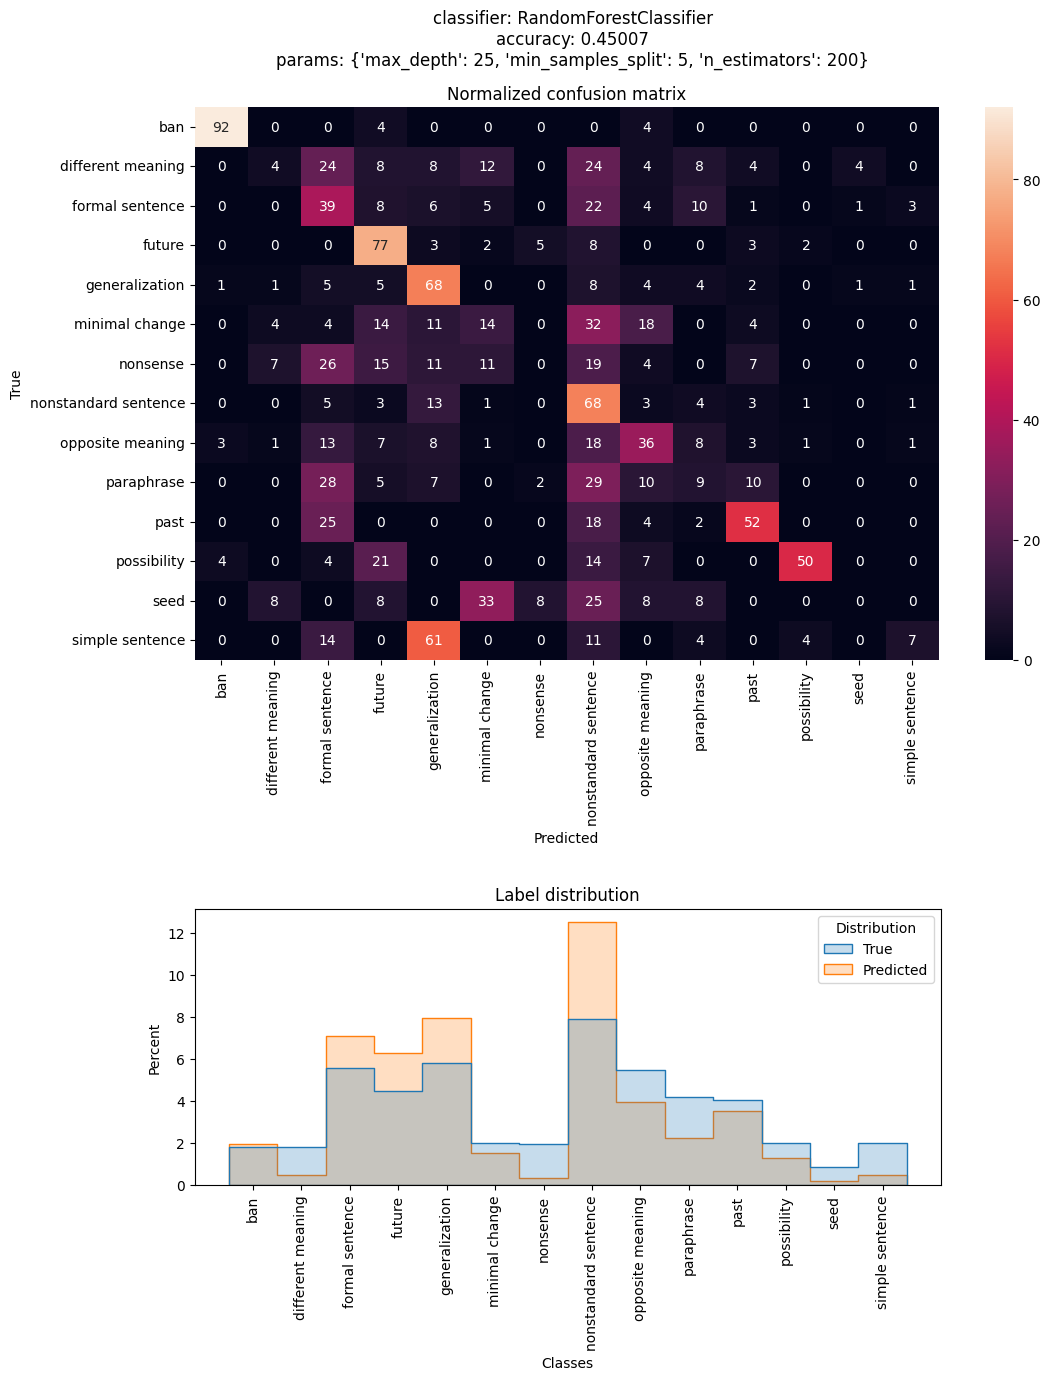

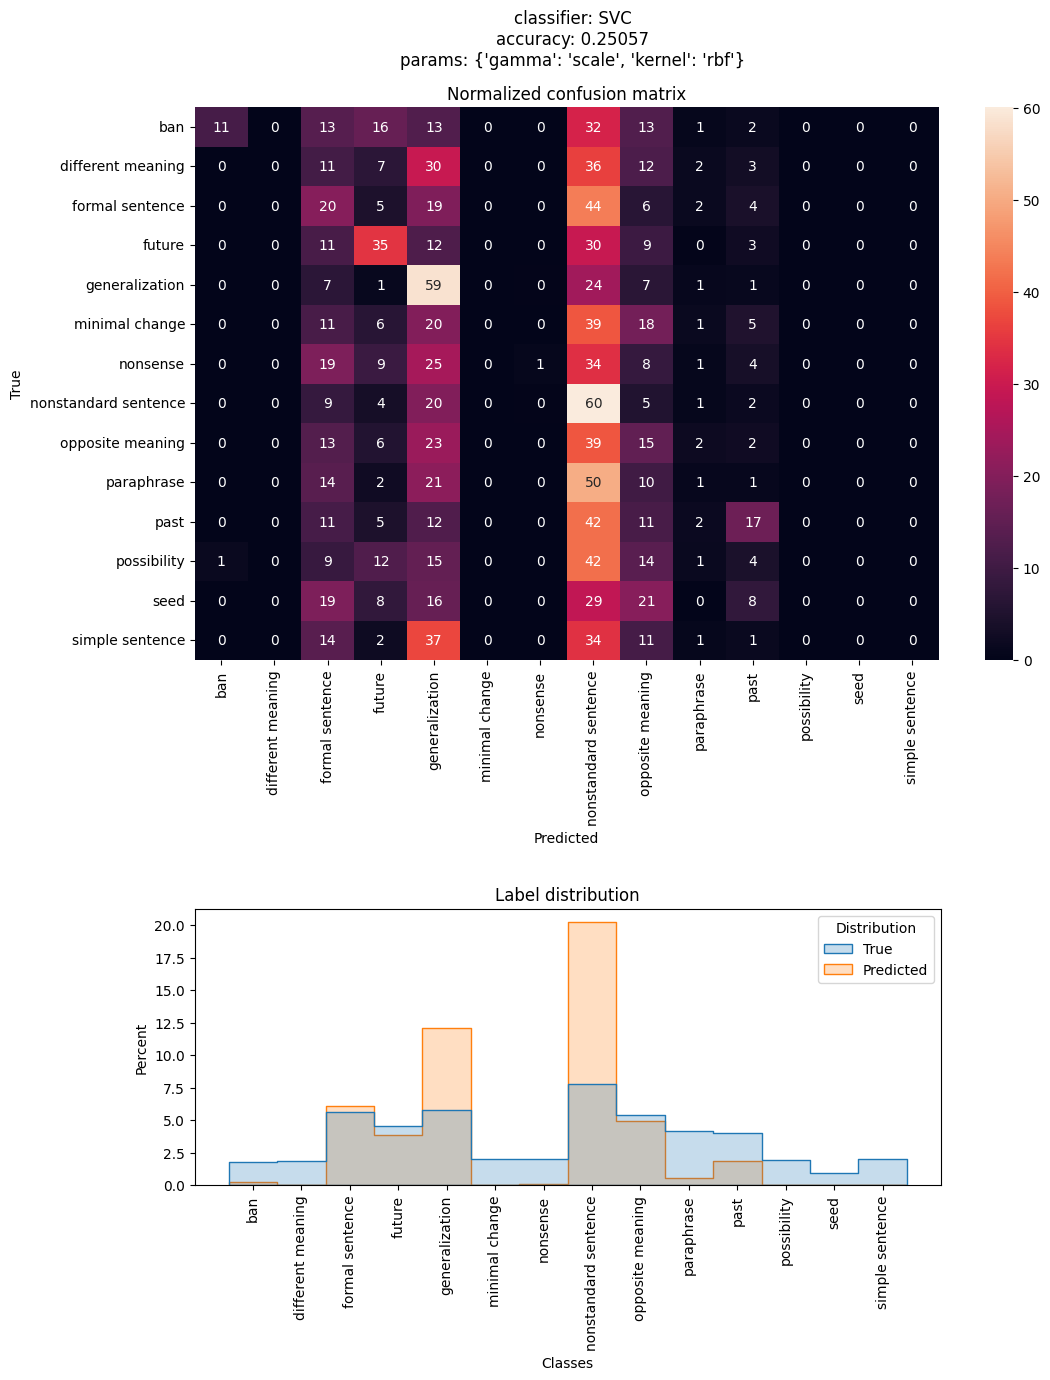

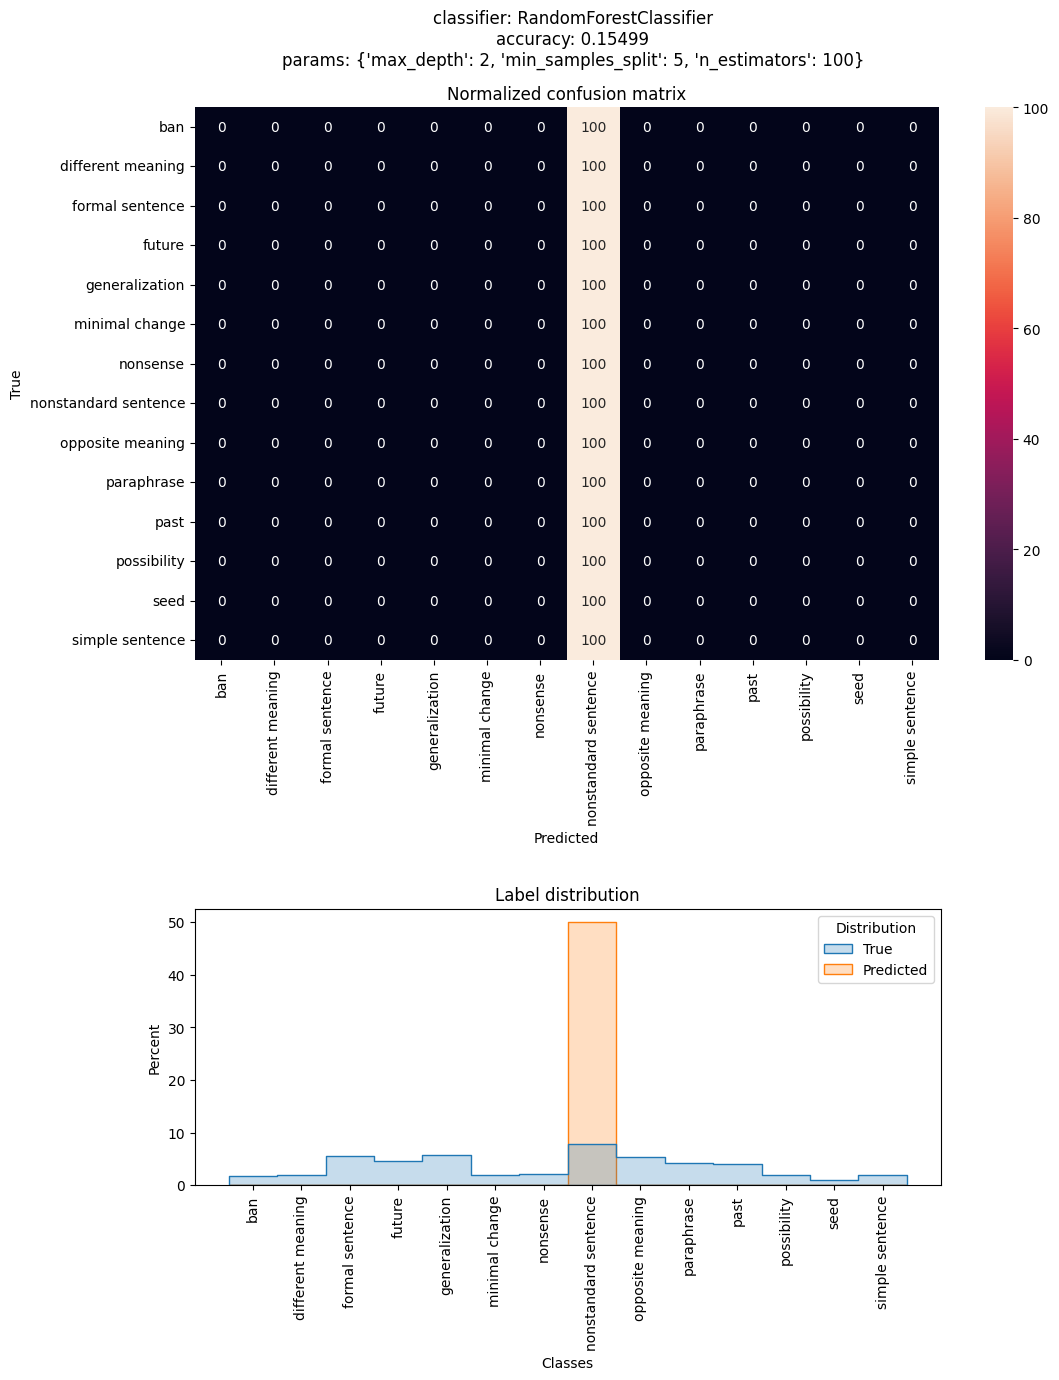

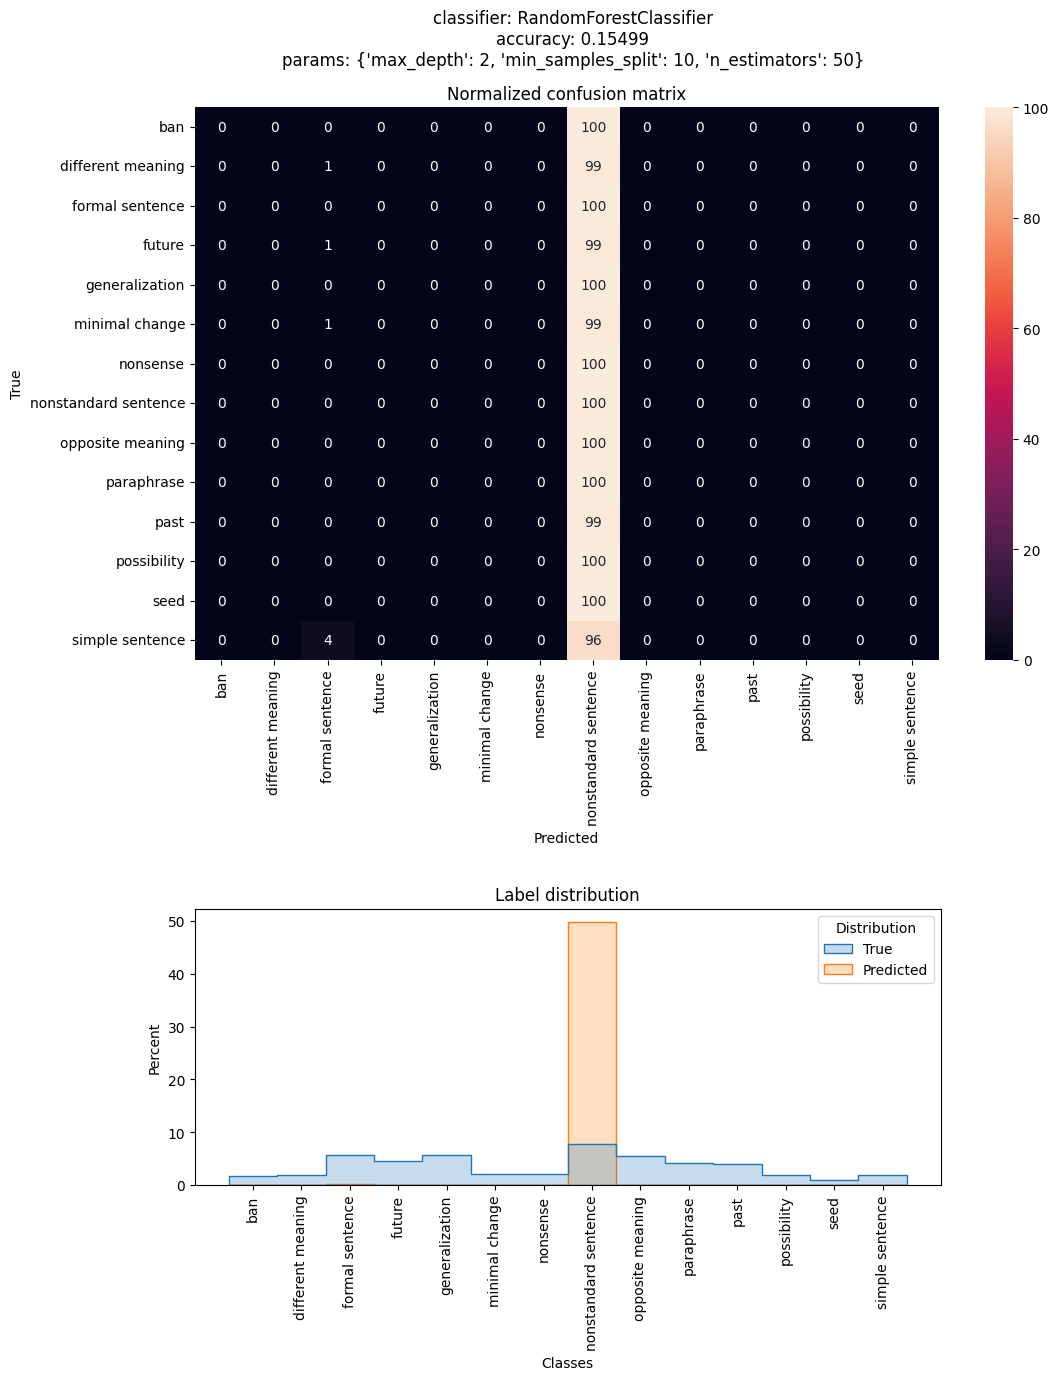

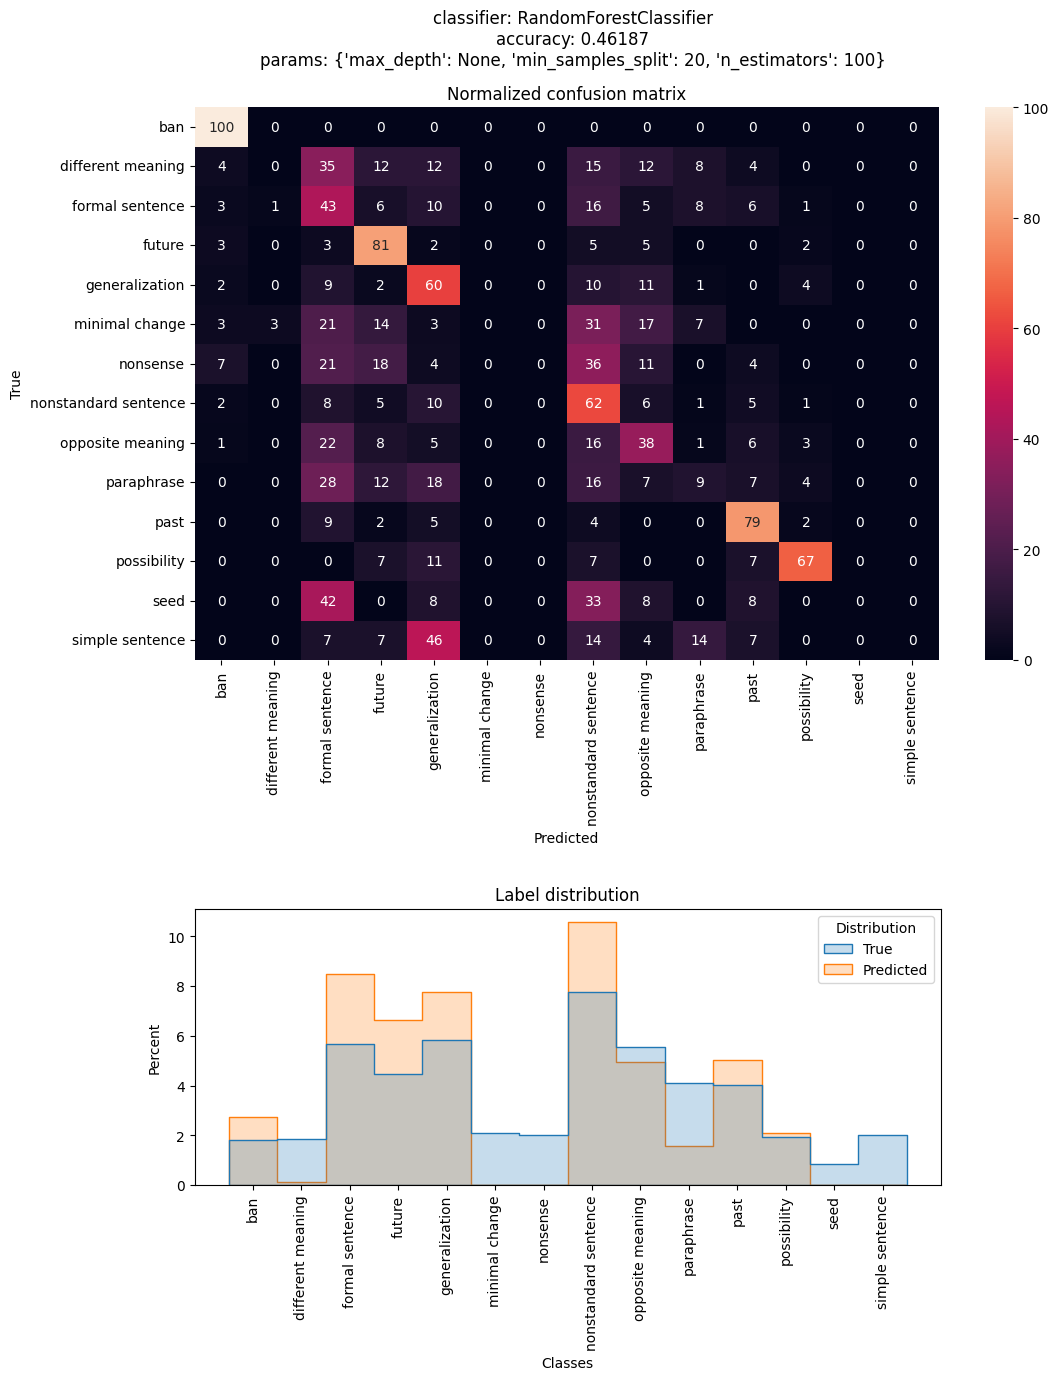

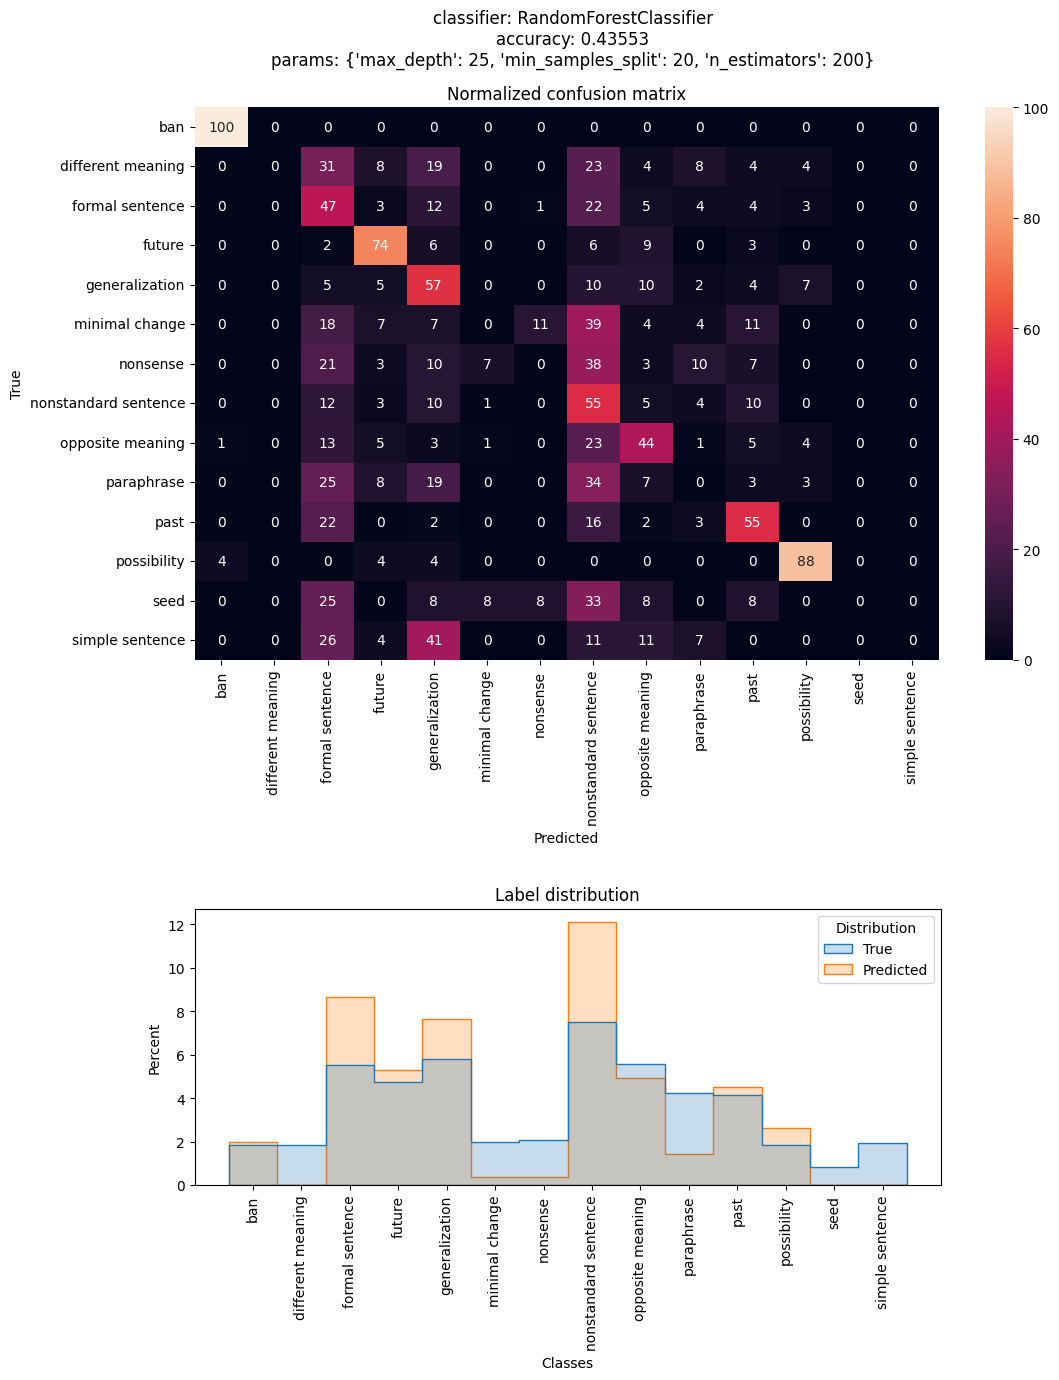

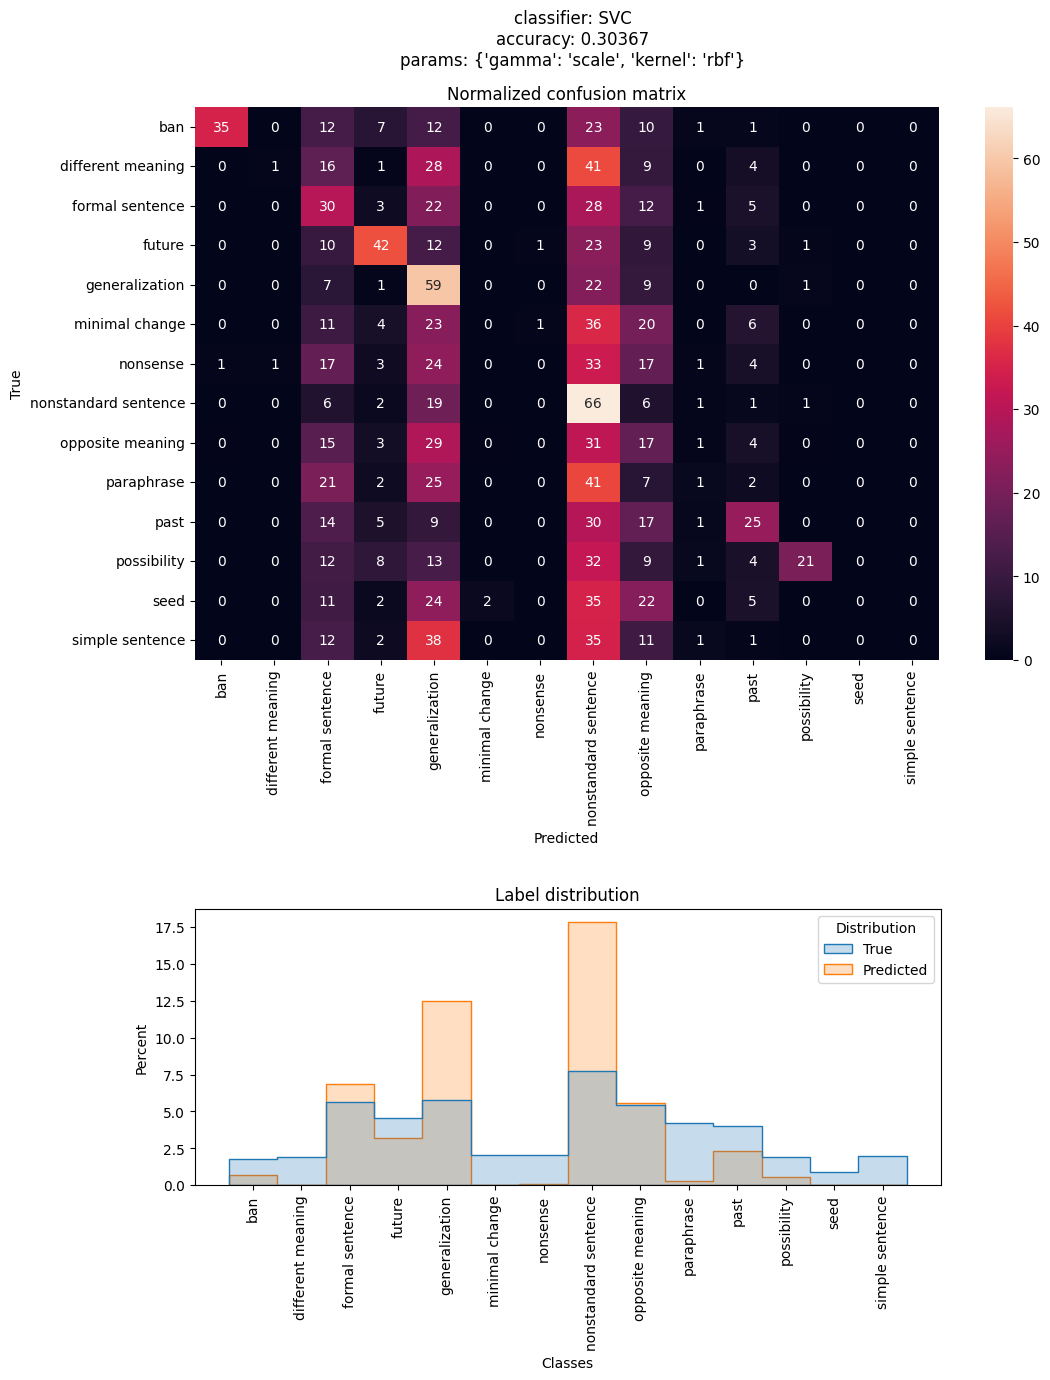

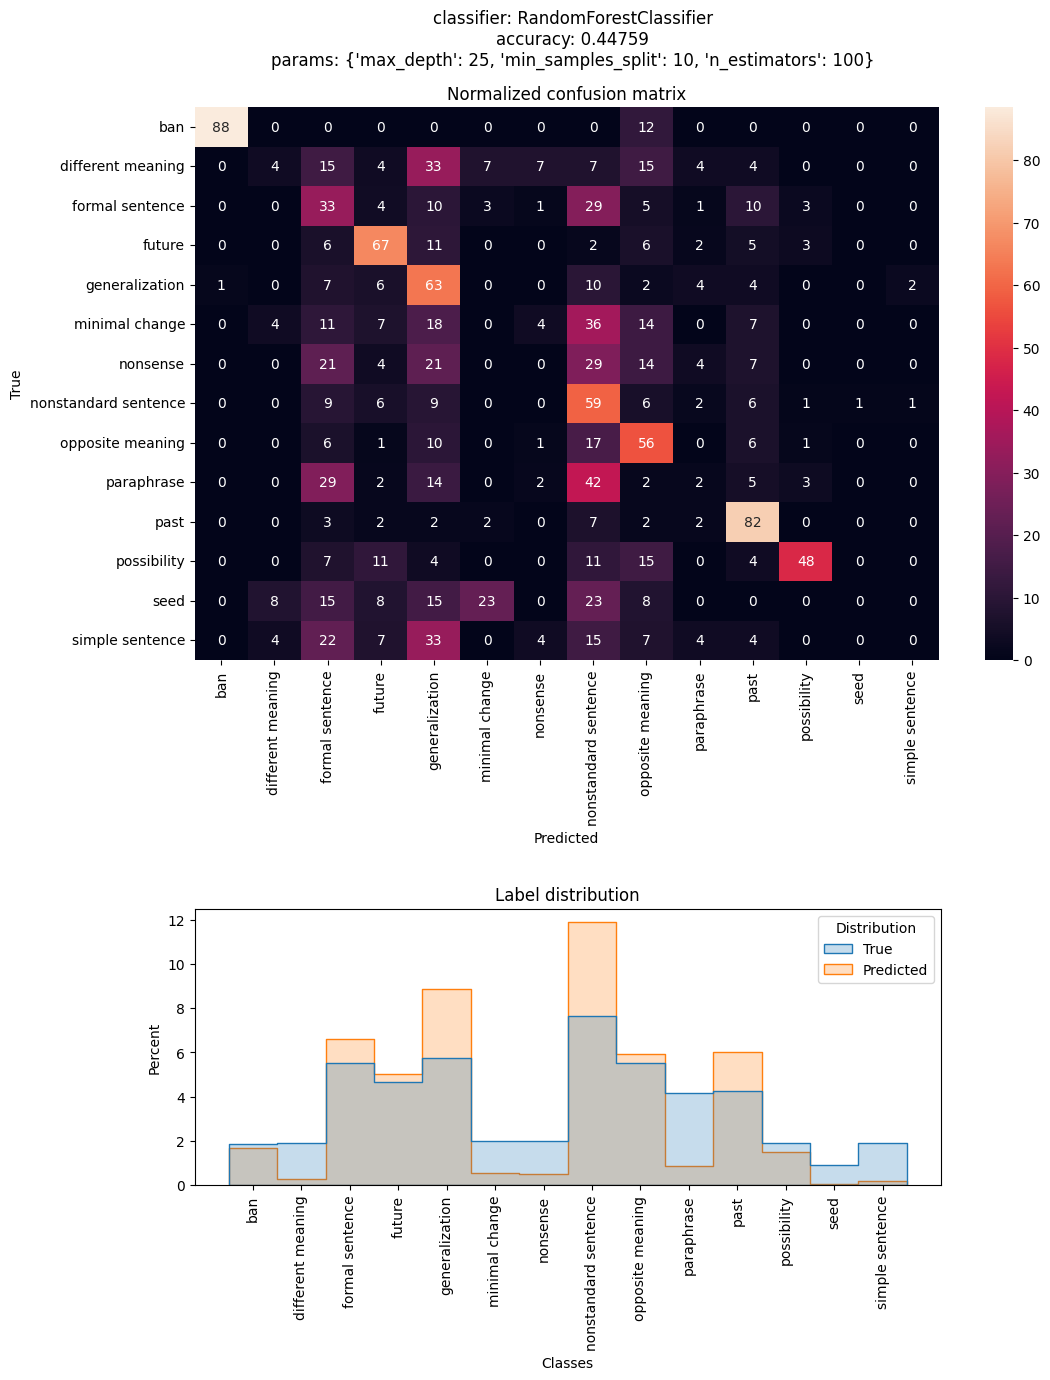

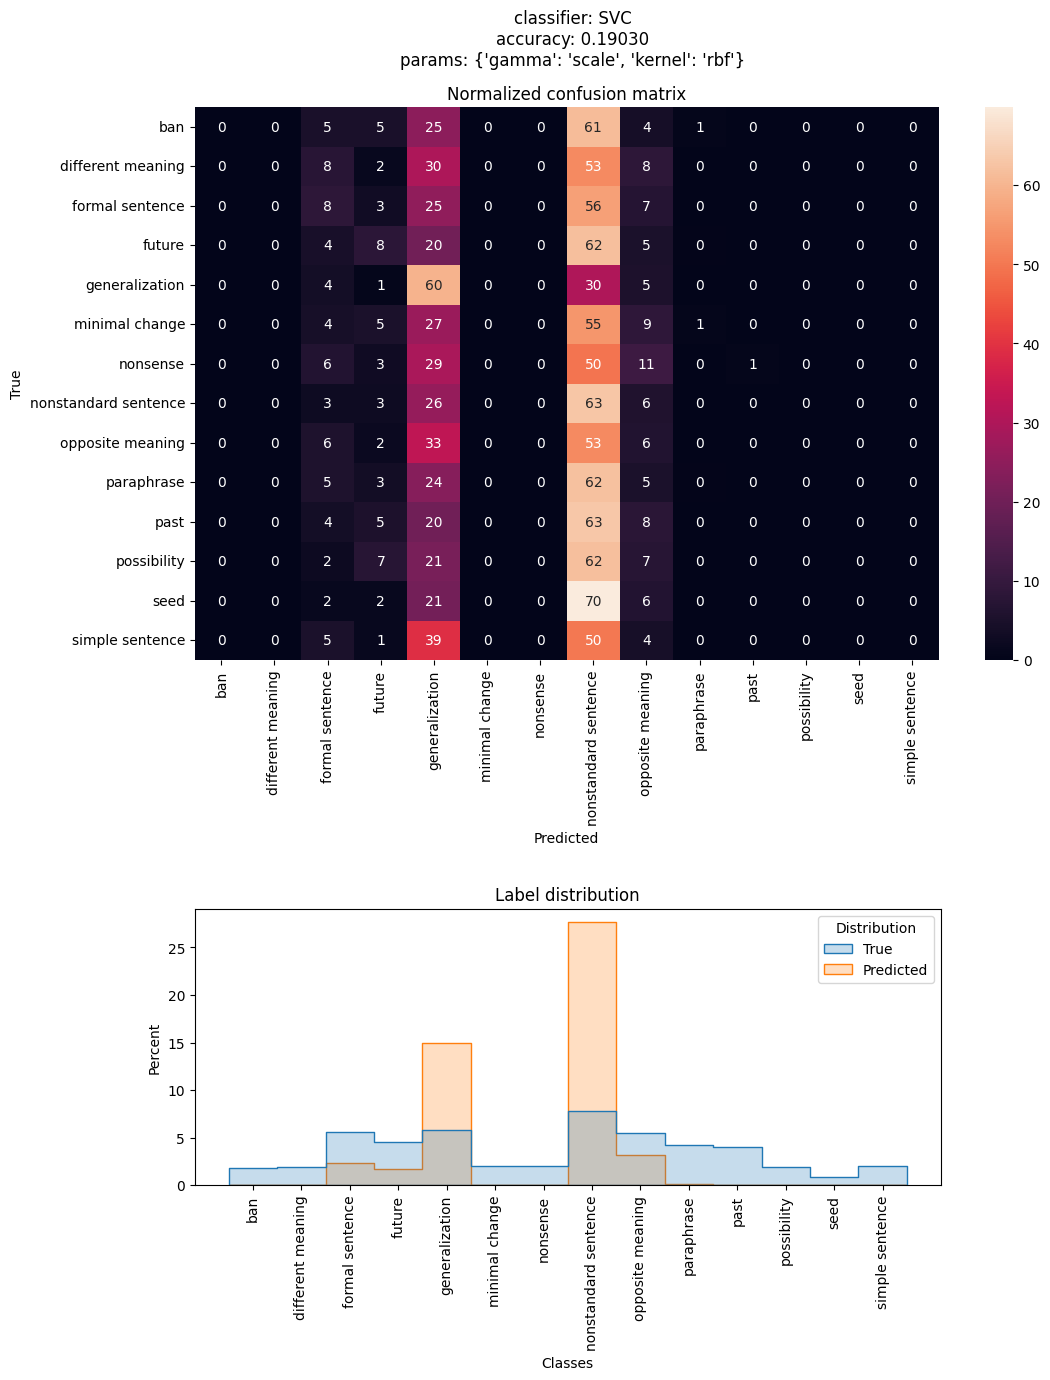

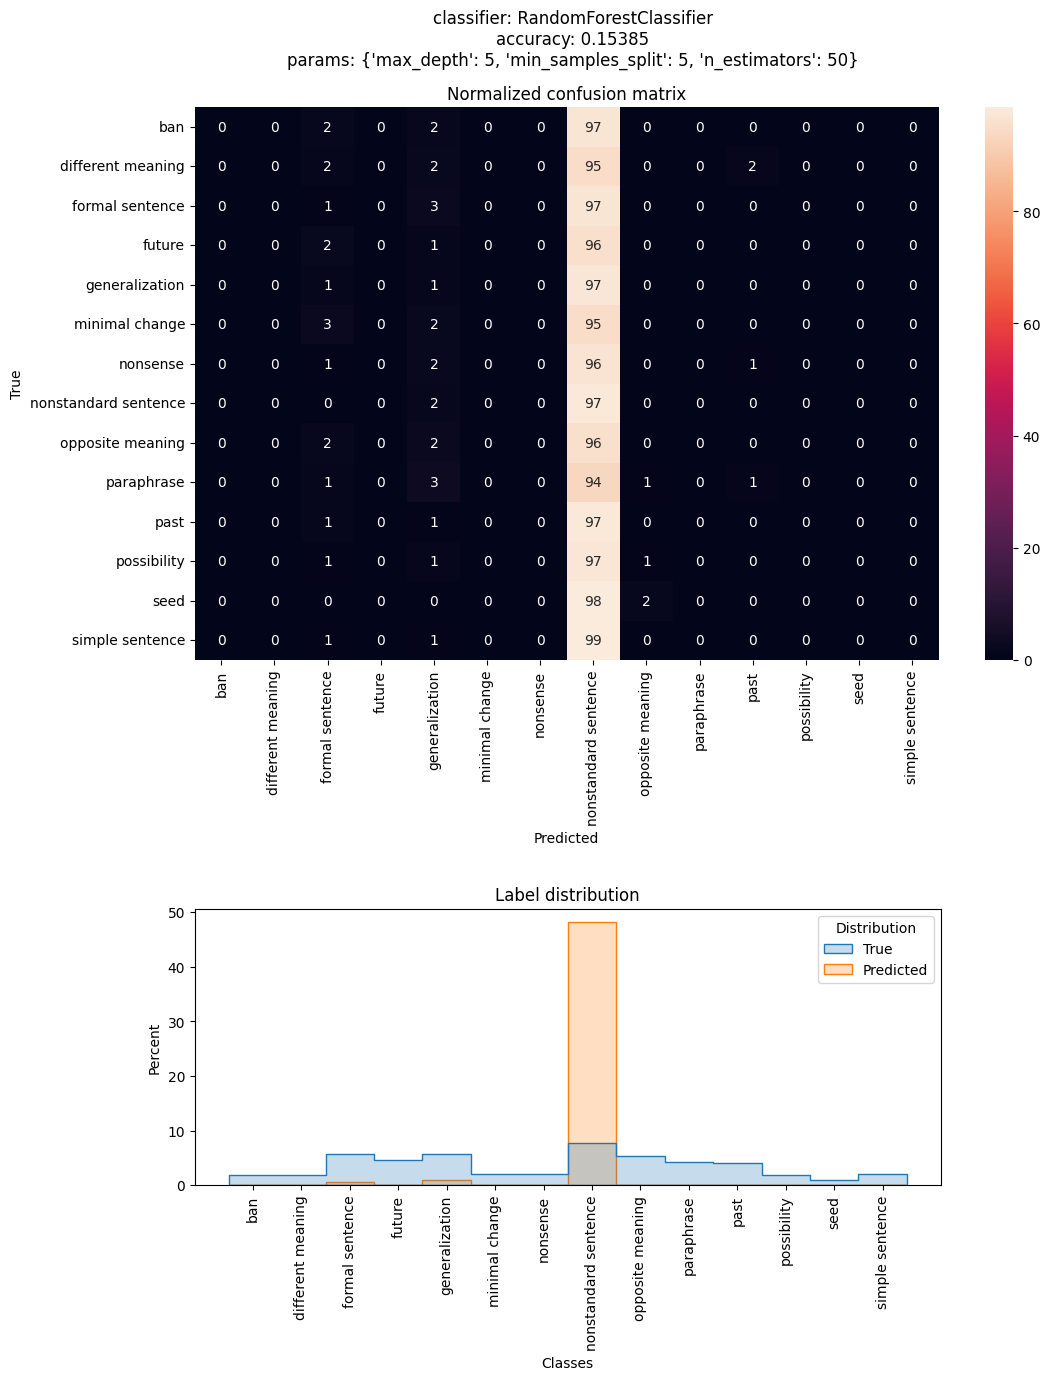

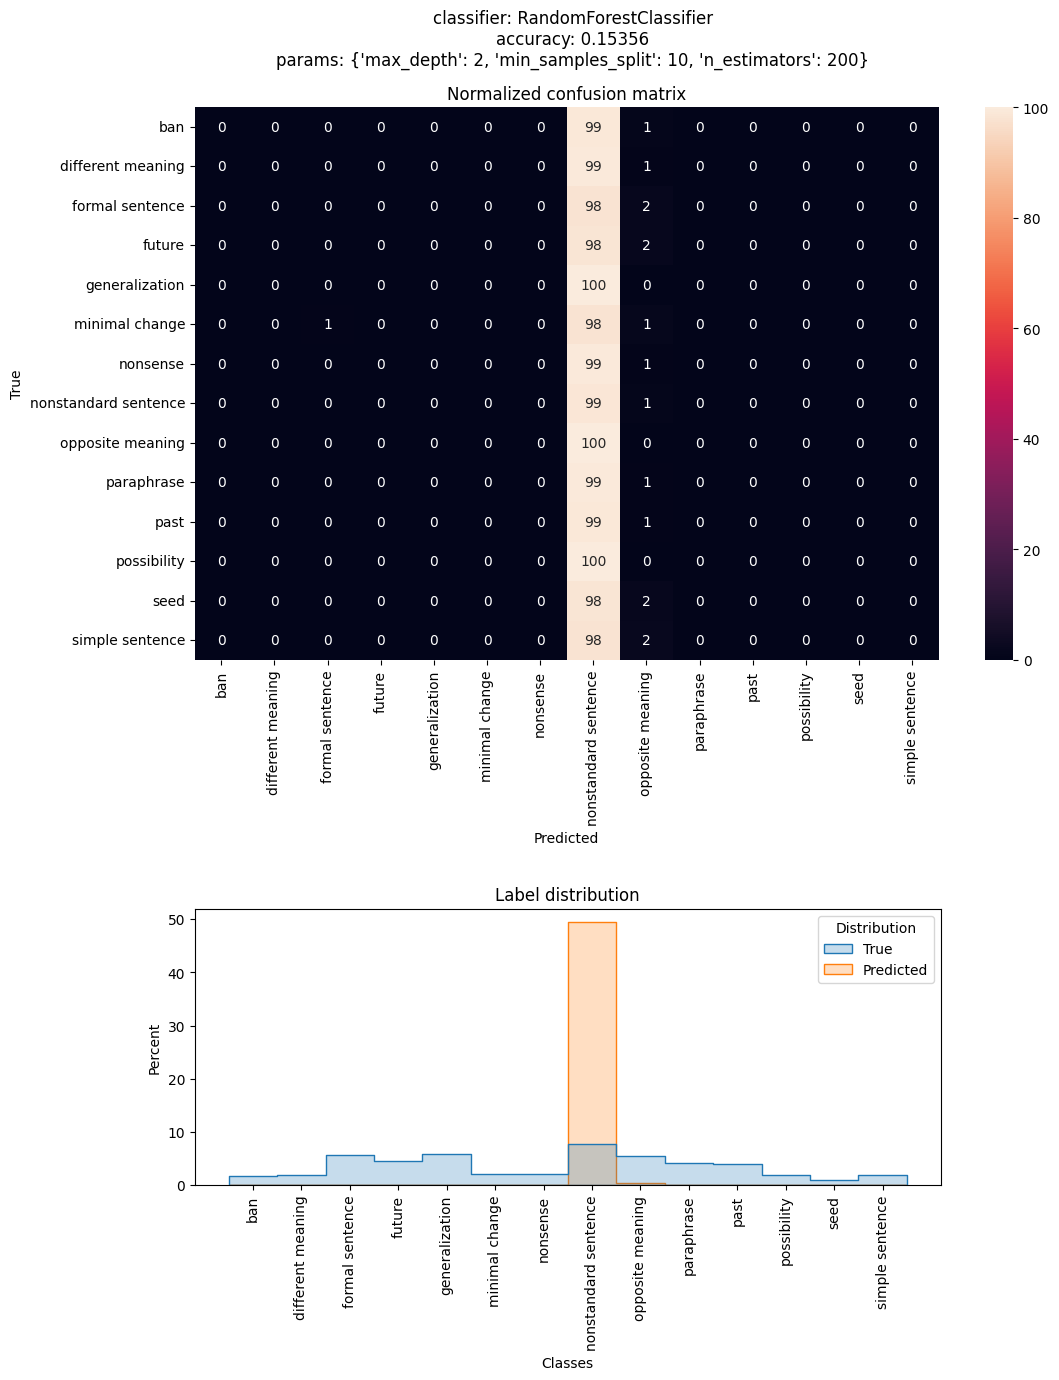

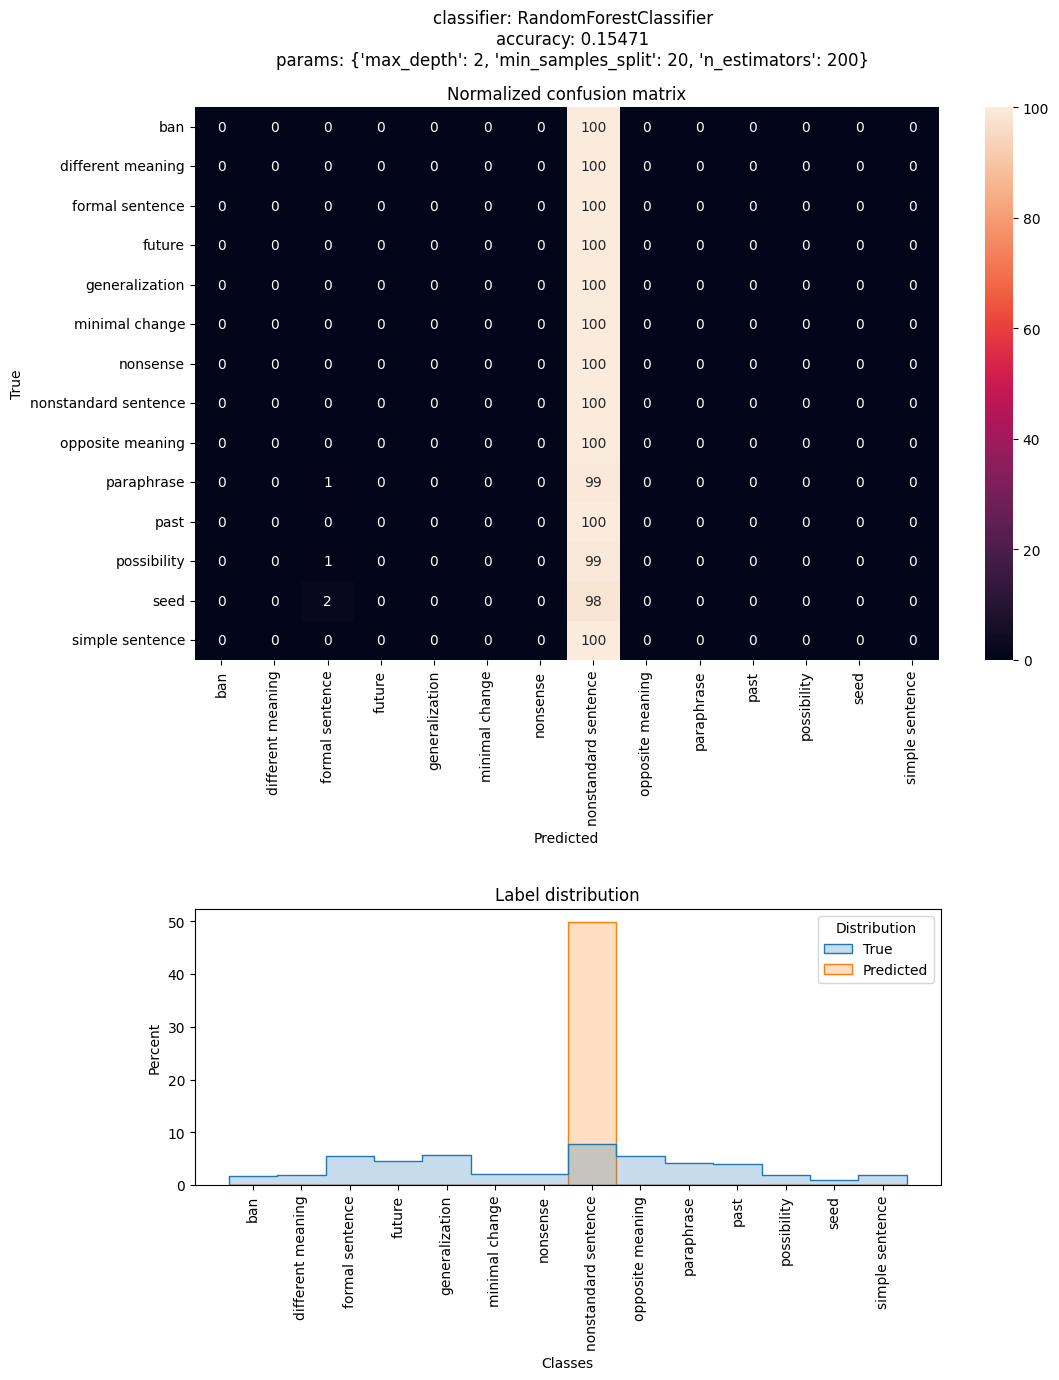

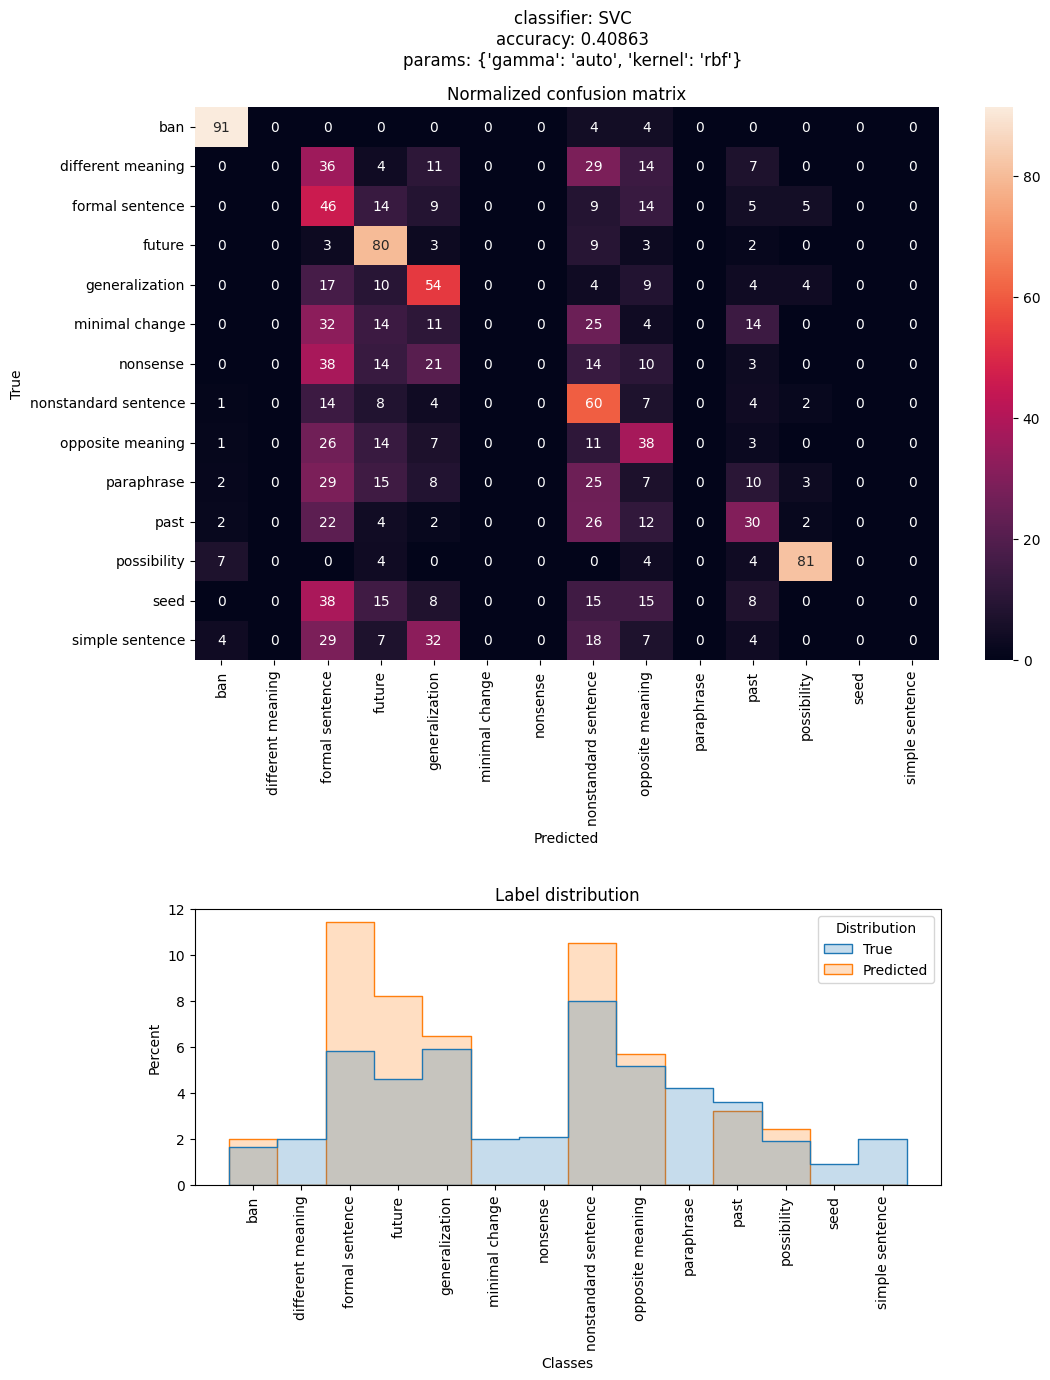

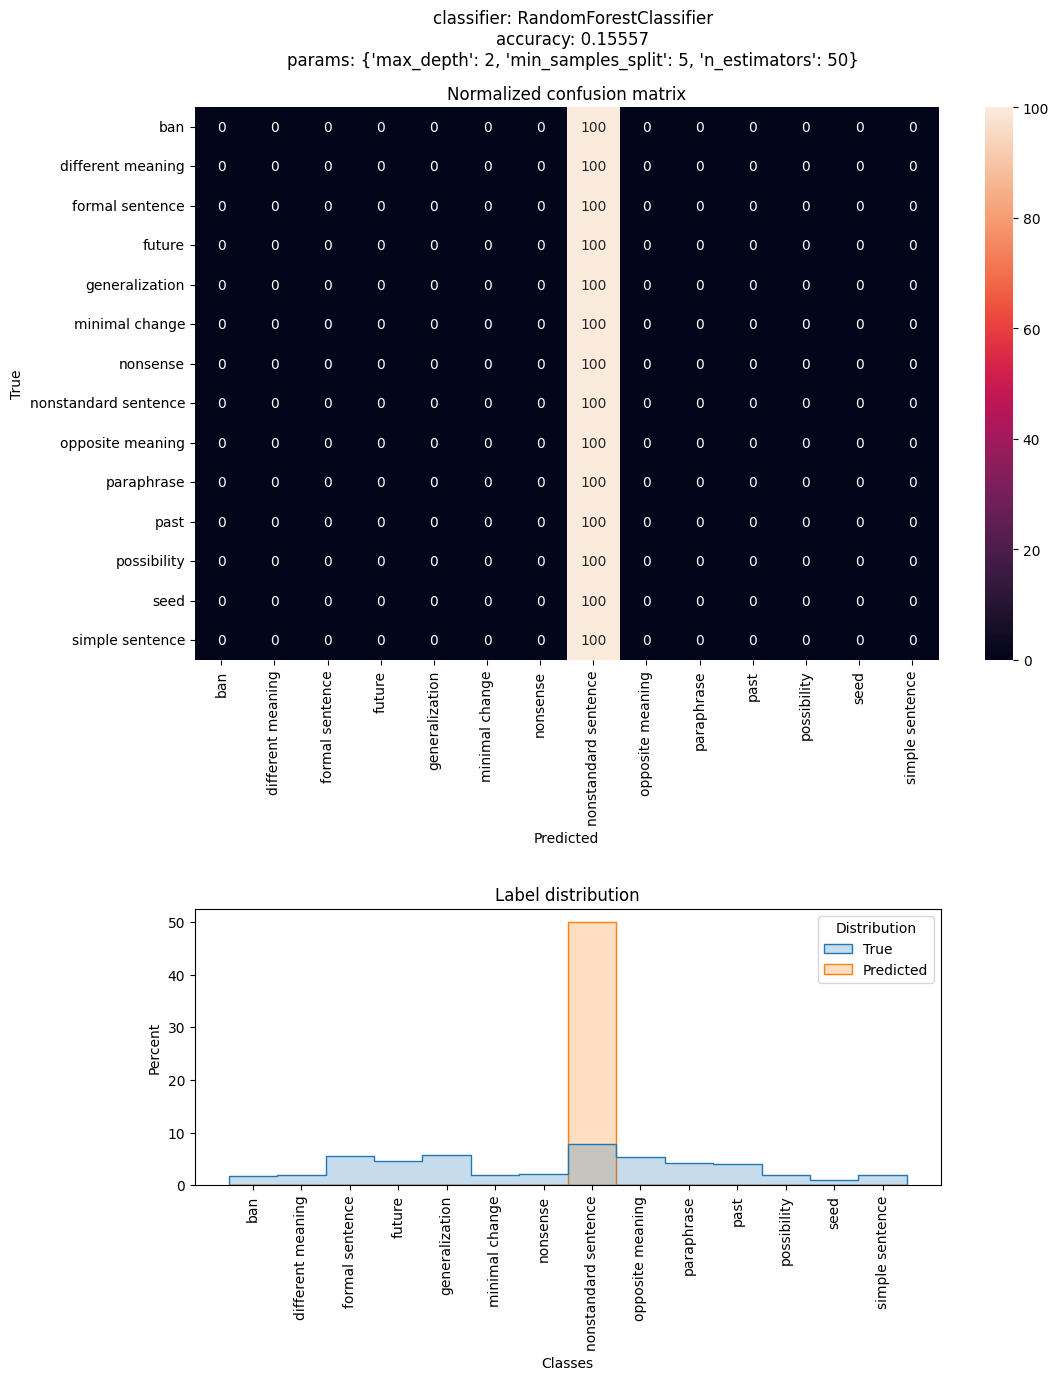

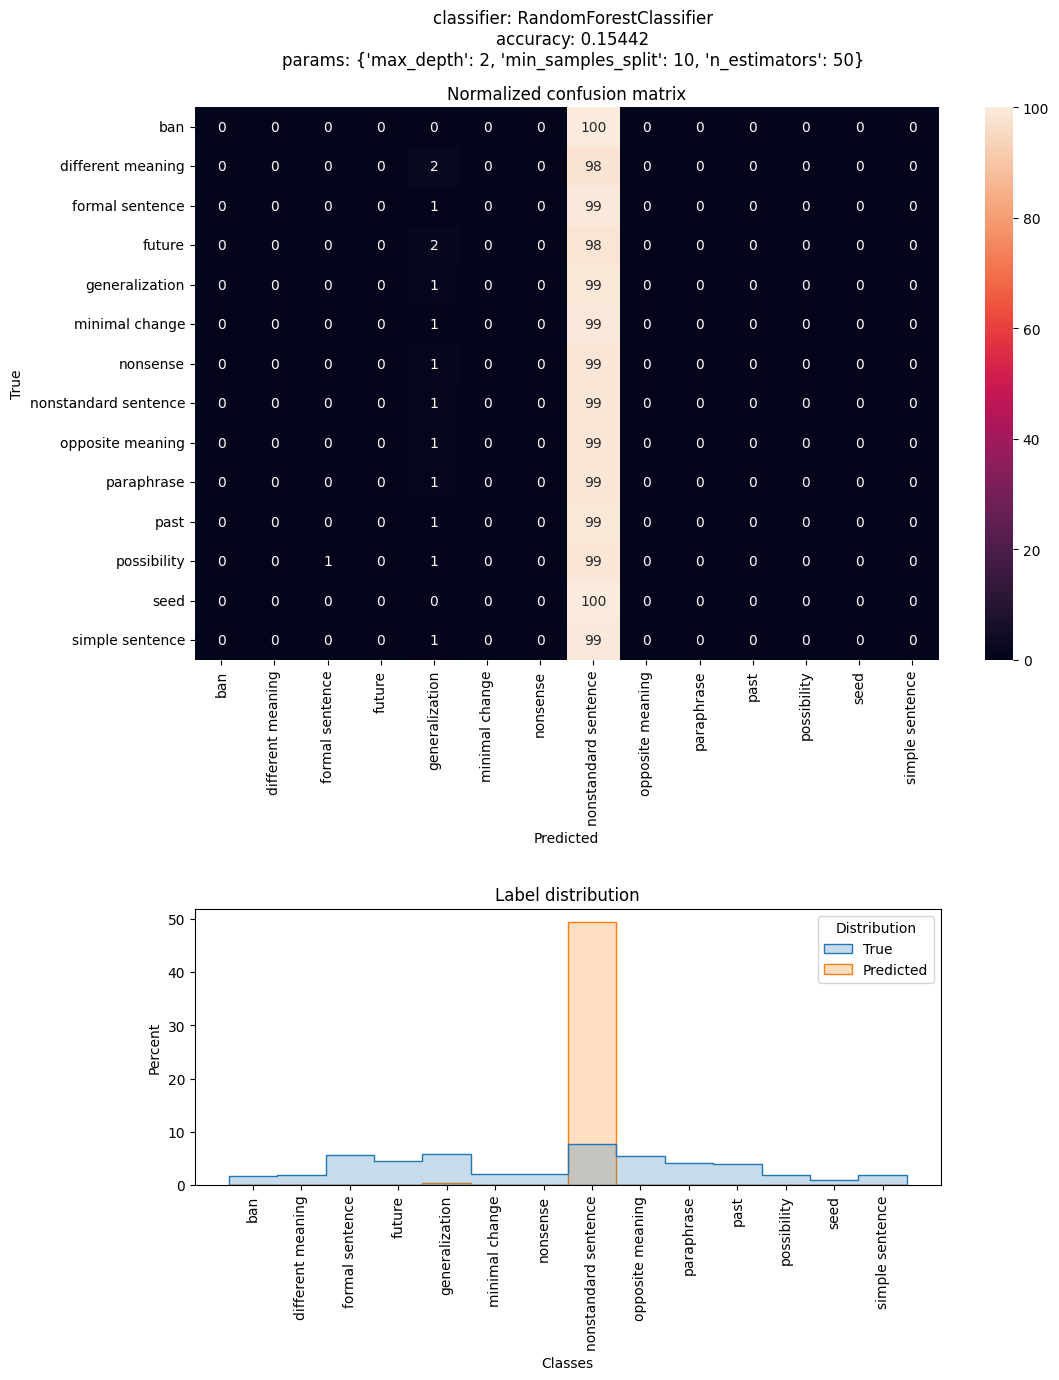

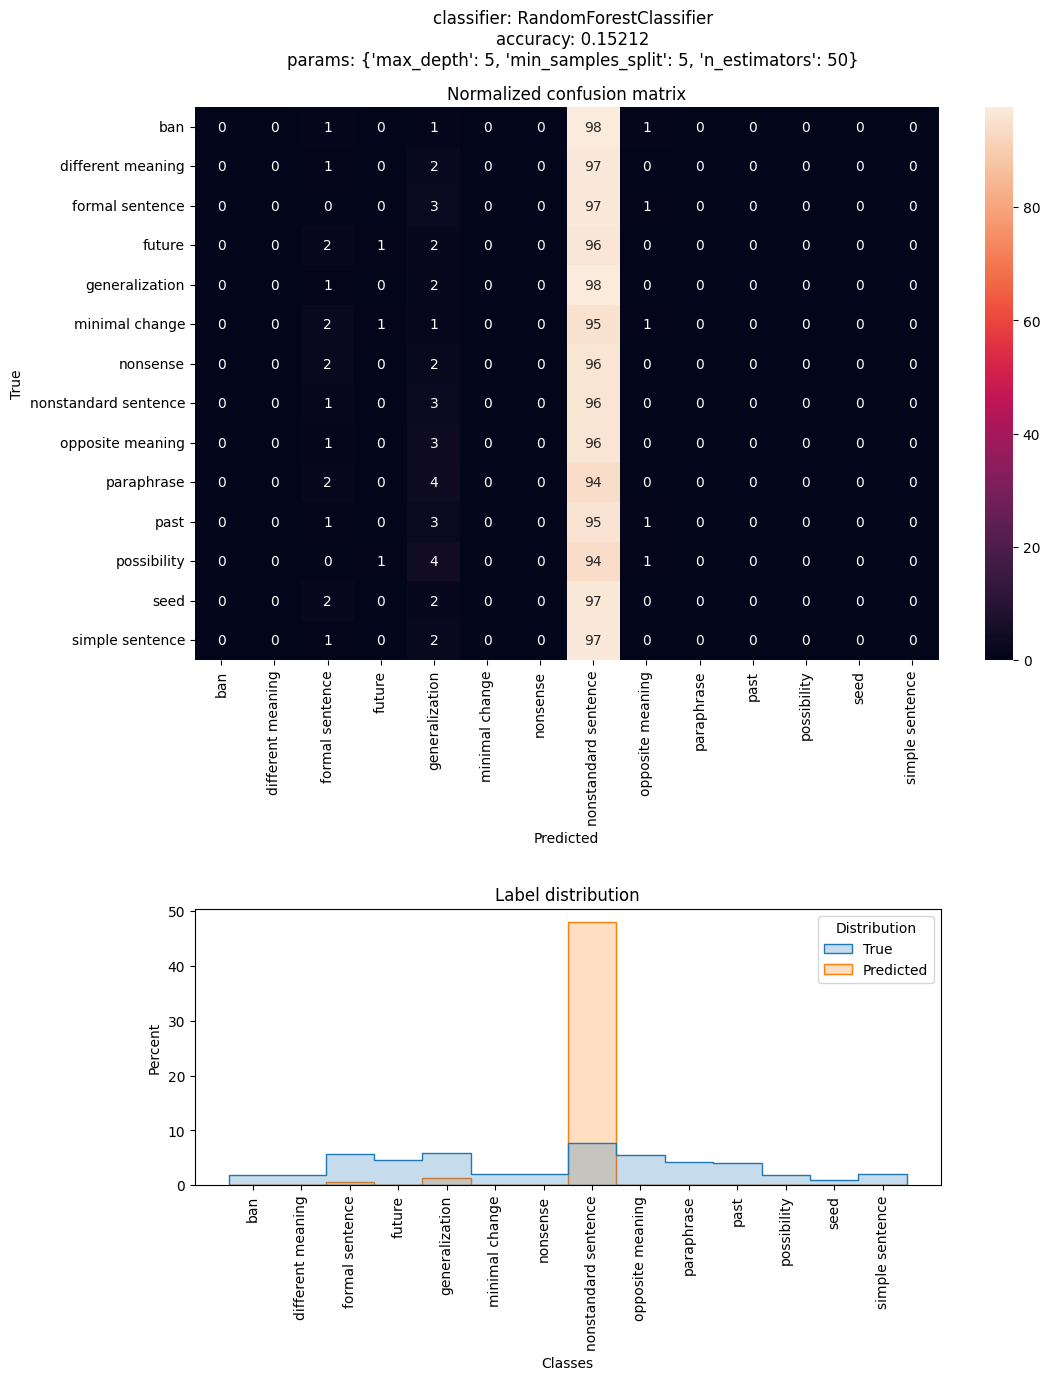

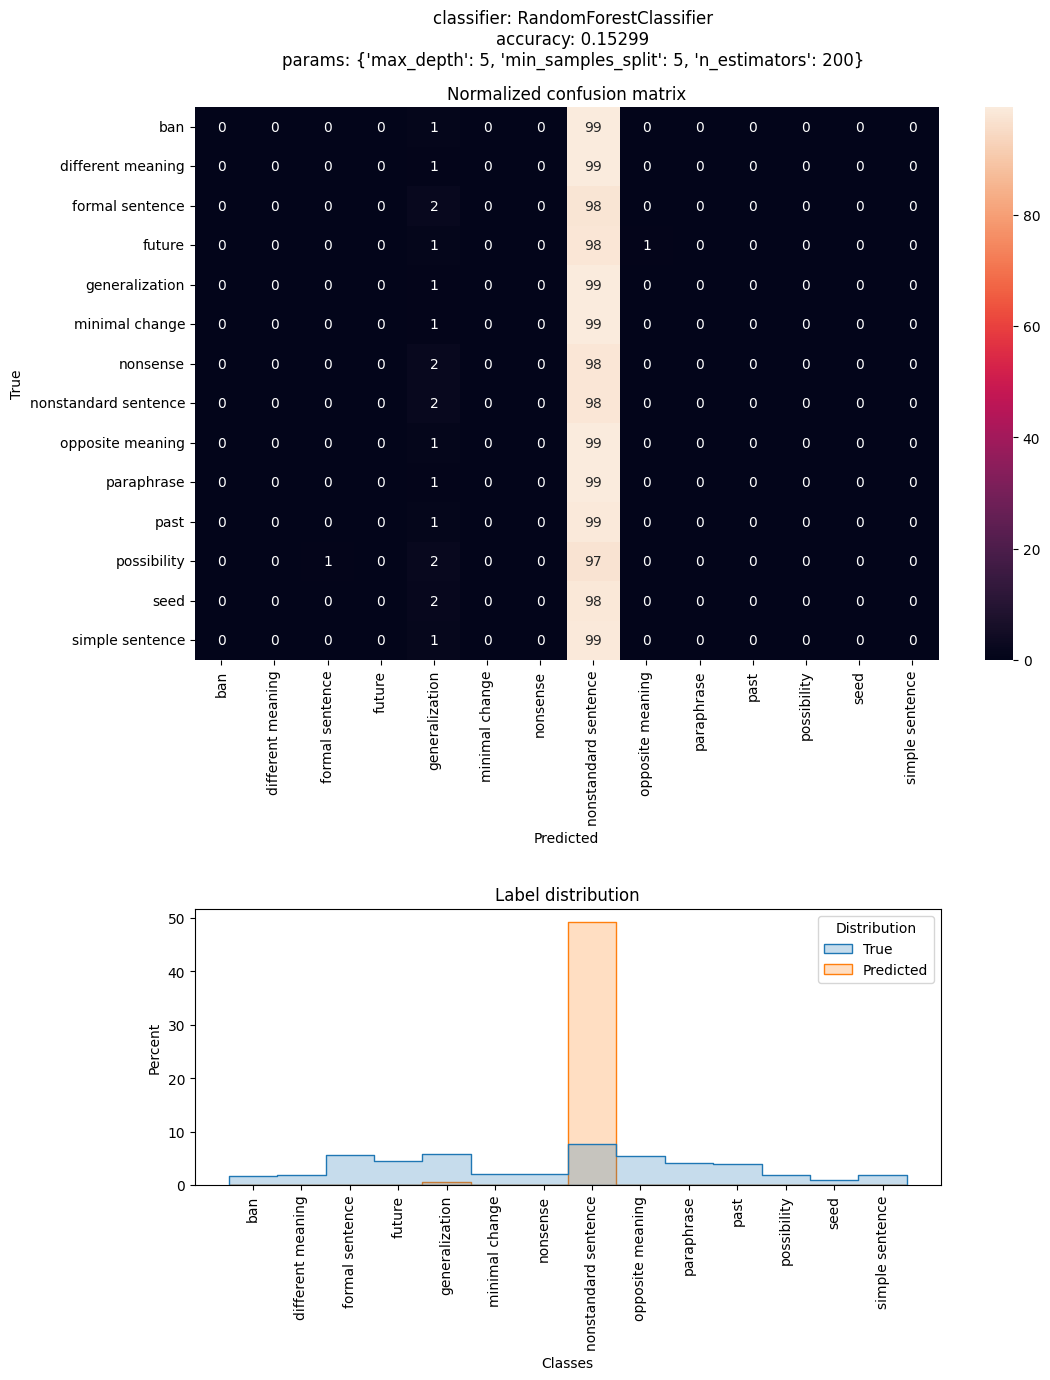

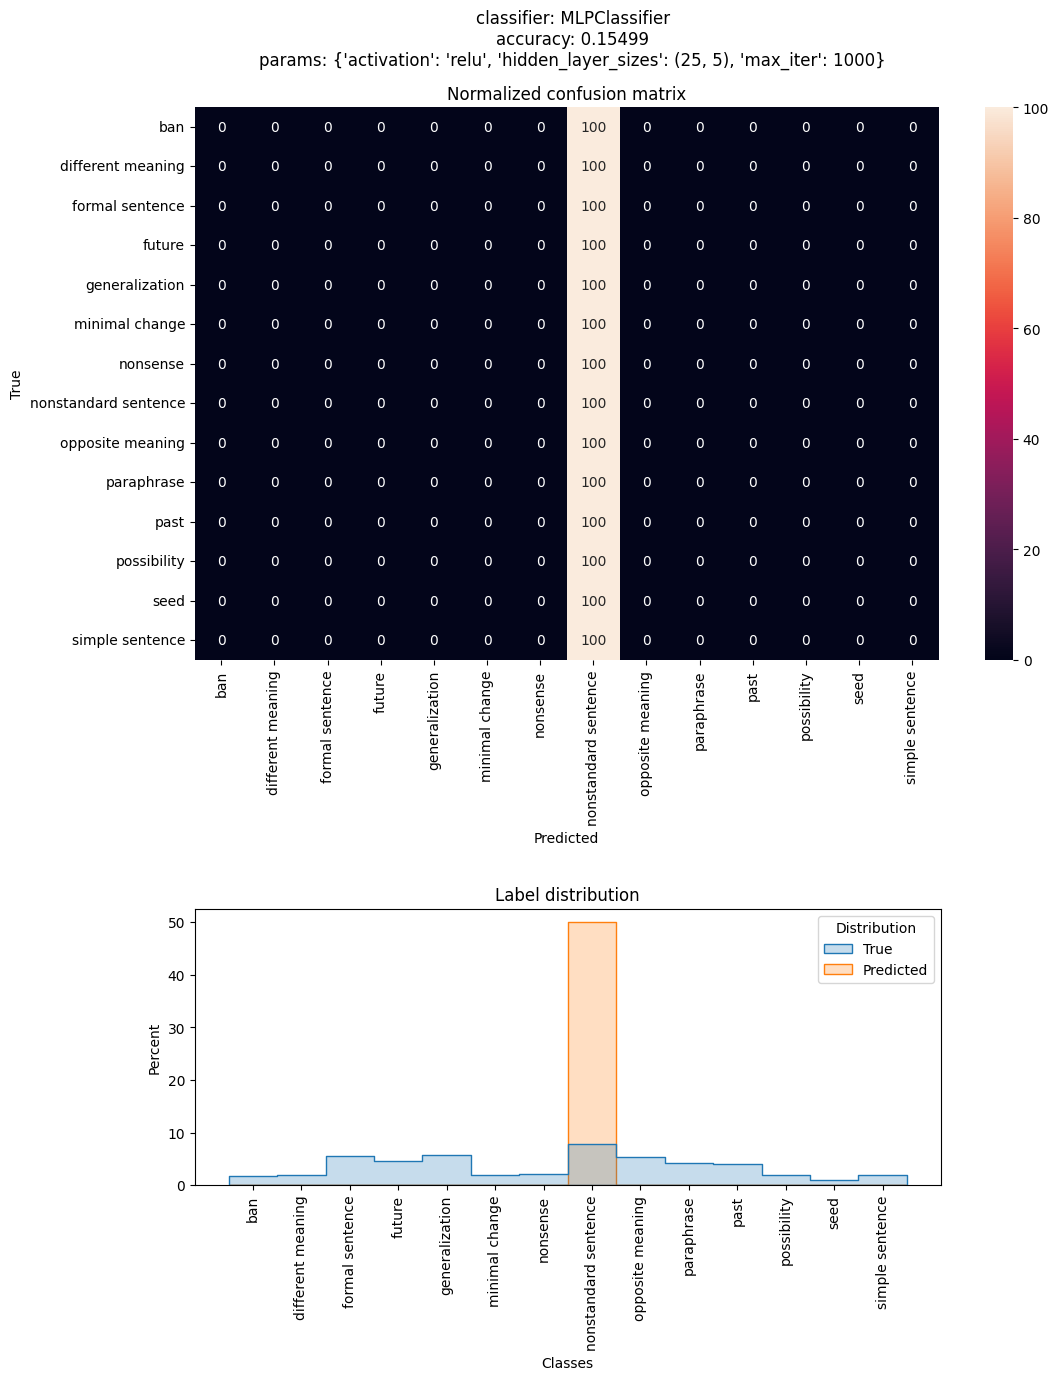

In [5]:
classifier_name = "RandomForestClassifier"
embed_file = "paraphrase-multilingual-MiniLM-L12-v2_supervised_2.tsv"

for embed_name, embed_scores in tqdm(scores.iterrows(), total=scores.shape[0]):
    best_classifier_name = embed_scores.idxmax()

    cls_params = params.loc[embed_name, best_classifier_name]
    classifier = cls_type_by_name[best_classifier_name](**cls_params)
    embeddings = load_embedding(os.path.join("../embeddings", embed_name))

    analysis = analyze_classifier(list(embeddings), classifier)
    analysis.classifier_params = params.loc[embed_name, best_classifier_name]

    analysis.save(f"../results/best_classifier_analysis-{embed_name}.pkl")
    fig = analysis.visualize()
    fig.savefig(
        f"../results/figs/best_classifier_analysis-{embed_name}.png",
        bbox_inches="tight",
    )